In [2583]:
#!pip install catboost
#!pip install shap

In [2584]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report
import shap
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [2585]:
df = pd.read_csv('online_gaming_behavior_dataset.csv')

In [2586]:
df.head()

PlayerID  Age  Gender Location GameGenre  PlayTimeHours  InGamePurchases  \
0      9000   43    Male    Other  Strategy      16.271119                0   
1      9001   29  Female      USA  Strategy       5.525961                0   
2      9002   22  Female      USA    Sports       8.223755                0   
3      9003   35    Male      USA    Action       5.265351                1   
4      9004   33    Male   Europe    Action      15.531945                0   

  GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0         Medium                6                        108           79   
1         Medium                5                        144           11   
2           Easy               16                        142           35   
3           Easy                9                         85           57   
4         Medium                2                        131           95   

   AchievementsUnlocked EngagementLevel  
0                    25          Medium  
1                    10          Medium  
2                    41            High  
3                    47          Medium  
4                    37          Medium

In [2587]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [2588]:
df.describe().T

count          mean           std          min  \
PlayerID                   40034.0  29016.500000  11556.964675  9000.000000   
Age                        40034.0     31.992531     10.043227    15.000000   
PlayTimeHours              40034.0     12.024365      6.914638     0.000115   
InGamePurchases            40034.0      0.200854      0.400644     0.000000   
SessionsPerWeek            40034.0      9.471774      5.763667     0.000000   
AvgSessionDurationMinutes  40034.0     94.792252     49.011375    10.000000   
PlayerLevel                40034.0     49.655568     28.588379     1.000000   
AchievementsUnlocked       40034.0     24.526477     14.430726     0.000000   

                                    25%           50%           75%  \
PlayerID                   19008.250000  29016.500000  39024.750000   
Age                           23.000000     32.000000     41.000000   
PlayTimeHours                  6.067501     12.008002     17.963831   
InGamePurchases                0.000000      0.000000      0.000000   
SessionsPerWeek                4.000000      9.000000     14.000000   
AvgSessionDurationMinutes     52.000000     95.000000    137.000000   
PlayerLevel                   25.000000     49.000000     74.000000   
AchievementsUnlocked          12.000000     25.000000     37.000000   

                                    max  
PlayerID                   49033.000000  
Age                           49.000000  
PlayTimeHours                 23.999592  
InGamePurchases                1.000000  
SessionsPerWeek               19.000000  
AvgSessionDurationMinutes    179.000000  
PlayerLevel                   99.000000  
AchievementsUnlocked          49.000000

In [2589]:
df.isnull().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [2590]:
sns.histplot(data=df, x='Age',bins=35)

<Axes: xlabel='Age', ylabel='Count'>

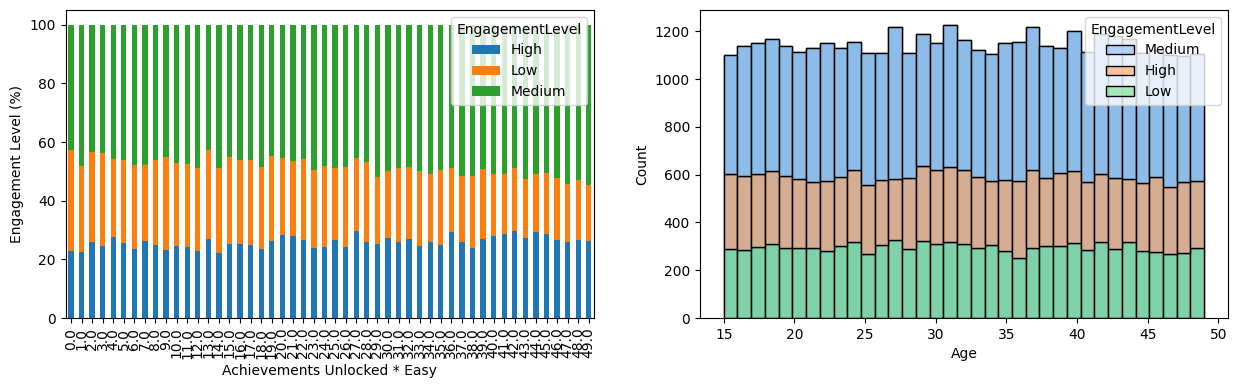

In [2591]:
sns.histplot(data=df, x='Age',bins=35,hue='EngagementLevel',multiple='stack',palette='pastel')
plt.show()

In [2592]:
df['Gender'].value_counts()

Gender
Male      23959
Female    16075
Name: count, dtype: int64

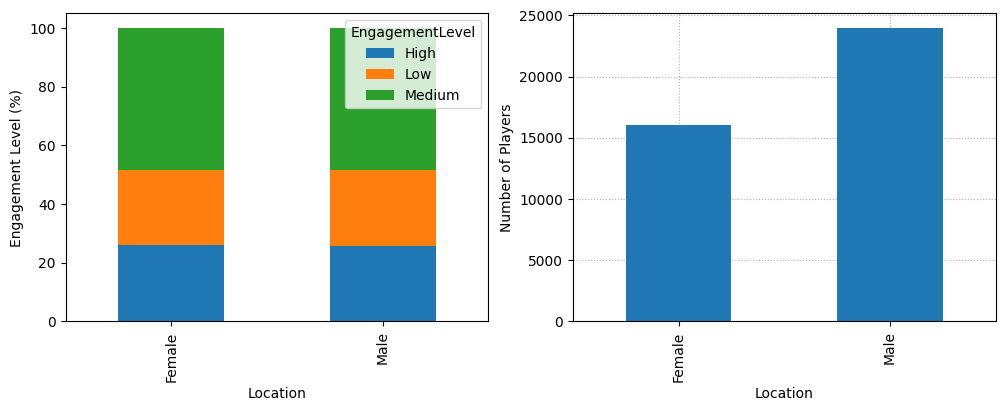

In [2593]:
plt.figure(figsize=(12, 4))

x = 'Gender'

ax1 = plt.subplot(1, 2, 1)

dff = pd.crosstab(df[x], df['EngagementLevel'])
dff = dff.div(dff.sum(axis=1), axis=0) * 100

ax1 = dff.plot(kind='bar', stacked=True, ax=ax1)

# Formatting the plot
ax1.set_xlabel('Location')
ax1.set_ylabel('Engagement Level (%)')

ax2 = plt.subplot(1, 2, 2)
df.value_counts(x).sort_index().plot(kind='bar', ax=ax2)
ax2.grid(linestyle=':')
ax2.set_axisbelow(True)
ax2.set_xlabel('Location')
ax2.set_ylabel('Number of Players')

# Show the plot
plt.show()

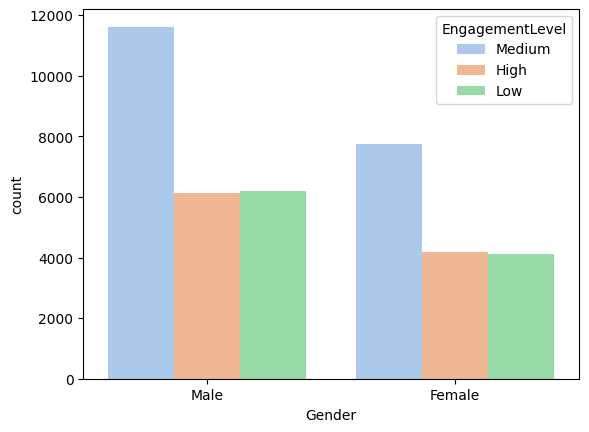

In [2594]:
sns.countplot(data=df, x='Gender',hue='EngagementLevel',palette='pastel')
plt.show()

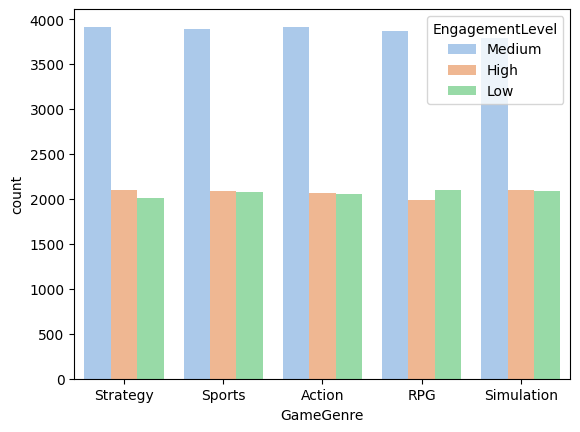

In [2595]:
sns.countplot(data=df, x='GameGenre',hue='EngagementLevel',palette='pastel')
plt.show()

In [2596]:
df['Location'].value_counts()

Location
USA       16000
Europe    12004
Asia       8095
Other      3935
Name: count, dtype: int64

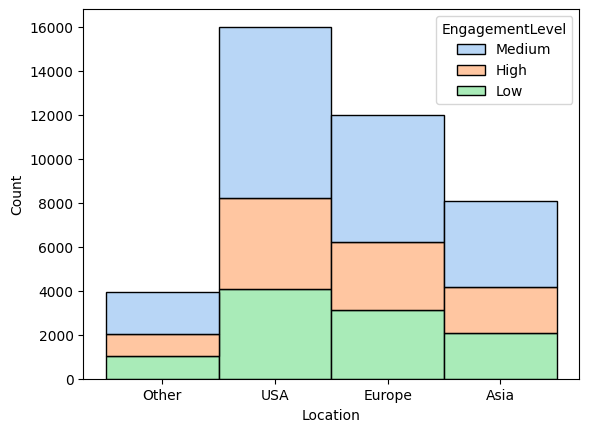

In [2597]:
sns.histplot(data=df, x='Location',bins=35,hue='EngagementLevel',multiple='stack',palette='pastel')
plt.show()

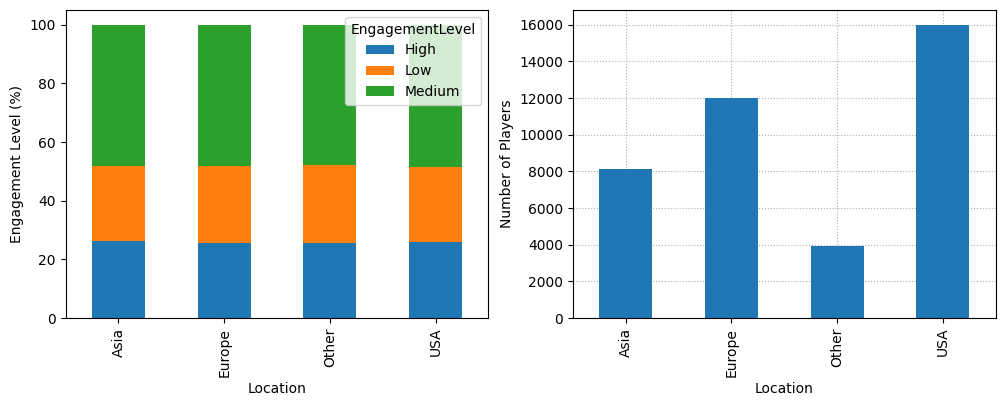

In [2598]:
plt.figure(figsize=(12, 4))

x = 'Location'

ax1 = plt.subplot(1, 2, 1)

dff = pd.crosstab(df[x], df['EngagementLevel'])
dff = dff.div(dff.sum(axis=1), axis=0) * 100

ax1 = dff.plot(kind='bar', stacked=True, ax=ax1)

# Formatting the plot
ax1.set_xlabel('Location')
ax1.set_ylabel('Engagement Level (%)')

ax2 = plt.subplot(1, 2, 2)
df.value_counts(x).sort_index().plot(kind='bar', ax=ax2)
ax2.grid(linestyle=':')
ax2.set_axisbelow(True)
ax2.set_xlabel('Location')
ax2.set_ylabel('Number of Players')

# Show the plot
plt.show()

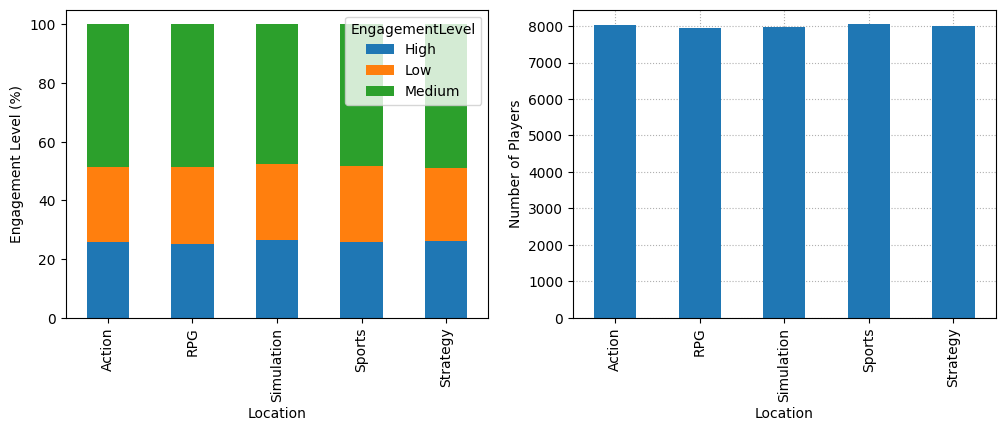

In [2599]:
plt.figure(figsize=(12, 4))

x = 'GameGenre'

ax1 = plt.subplot(1, 2, 1)

dff = pd.crosstab(df[x], df['EngagementLevel'])
dff = dff.div(dff.sum(axis=1), axis=0) * 100

ax1 = dff.plot(kind='bar', stacked=True, ax=ax1)

# Formatting the plot
ax1.set_xlabel('Location')
ax1.set_ylabel('Engagement Level (%)')

ax2 = plt.subplot(1, 2, 2)
df.value_counts(x).sort_index().plot(kind='bar', ax=ax2)
ax2.grid(linestyle=':')
ax2.set_axisbelow(True)
ax2.set_xlabel('Location')
ax2.set_ylabel('Number of Players')

# Show the plot
plt.show()

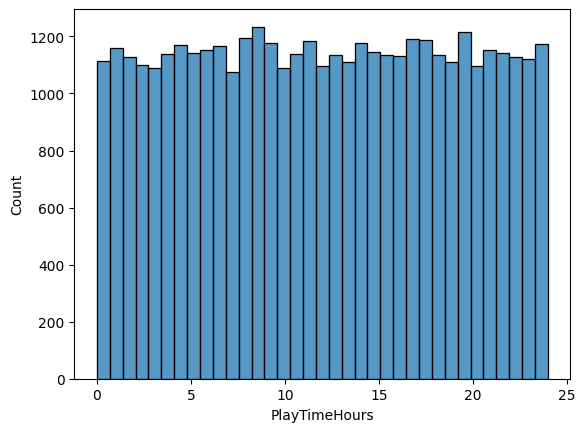

In [2600]:
sns.histplot(x='PlayTimeHours',data=df)
plt.show()

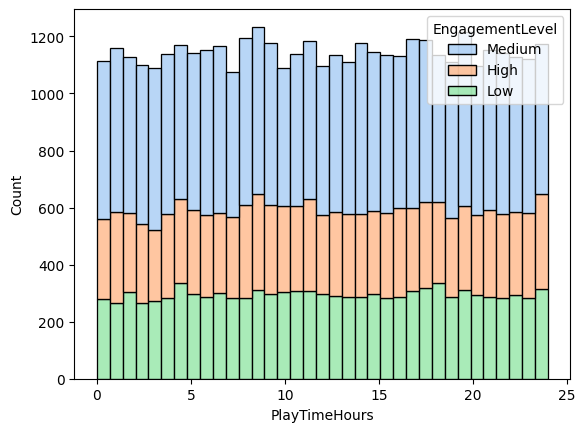

In [2601]:
sns.histplot(data=df, x='PlayTimeHours',hue='EngagementLevel',multiple='stack',palette='pastel')
plt.show()

In [2736]:
df['InGamePurchases'].value_counts(normalize=True)

InGamePurchases
0    0.799146
1    0.200854
Name: proportion, dtype: float64

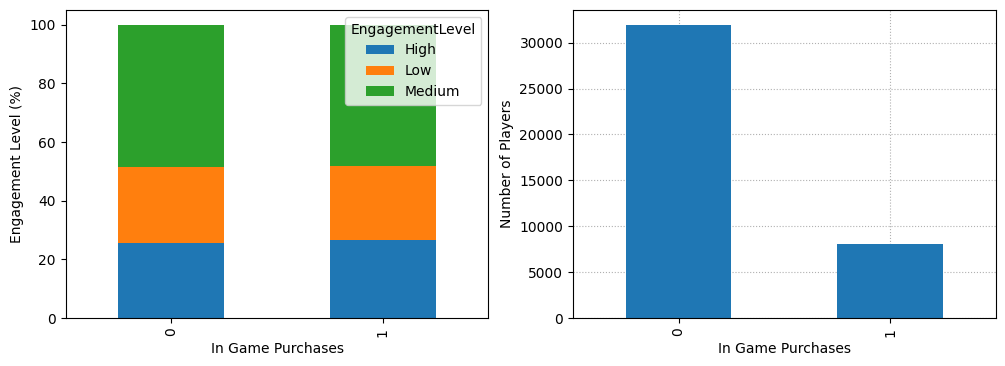

In [2603]:
plt.figure(figsize=(12, 4))

x = 'InGamePurchases'

ax1 = plt.subplot(1, 2, 1)

dff = pd.crosstab(df[x], df['EngagementLevel'])
dff = dff.div(dff.sum(axis=1), axis=0) * 100

ax1 = dff.plot(kind='bar', stacked=True, ax=ax1)

# Formatting the plot
ax1.set_xlabel('In Game Purchases')
ax1.set_ylabel('Engagement Level (%)')

ax2 = plt.subplot(1, 2, 2)
df.value_counts(x).sort_index().plot(kind='bar', ax=ax2)
ax2.grid(linestyle=':')
ax2.set_axisbelow(True)
ax2.set_xlabel('In Game Purchases')
ax2.set_ylabel('Number of Players')

# Show the plot
plt.show()

In [2604]:
df['GameDifficulty'].value_counts()

GameDifficulty
Easy      20015
Medium    12011
Hard       8008
Name: count, dtype: int64

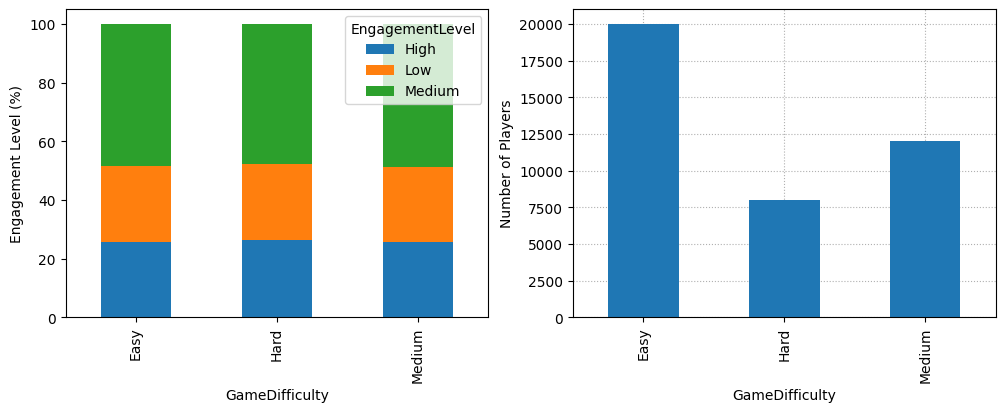

In [2605]:
plt.figure(figsize=(12, 4))

x = 'GameDifficulty'

ax1 = plt.subplot(1, 2, 1)

dff = pd.crosstab(df[x], df['EngagementLevel'])
dff = dff.div(dff.sum(axis=1), axis=0) * 100

ax1 = dff.plot(kind='bar', stacked=True, ax=ax1)

# Formatting the plot
ax1.set_xlabel('GameDifficulty')
ax1.set_ylabel('Engagement Level (%)')

ax2 = plt.subplot(1, 2, 2)
df.value_counts(x).sort_index().plot(kind='bar', ax=ax2)
ax2.grid(linestyle=':')
ax2.set_axisbelow(True)
ax2.set_xlabel('GameDifficulty')
ax2.set_ylabel('Number of Players')

# Show the plot
plt.show()

In [2606]:
df['SessionsPerWeek'].value_counts()

SessionsPerWeek
7     2137
4     2091
12    2052
5     2035
19    2032
3     2019
2     2018
16    2009
18    1998
6     1993
13    1983
1     1980
9     1974
0     1967
8     1963
11    1962
14    1958
17    1958
10    1956
15    1949
Name: count, dtype: int64

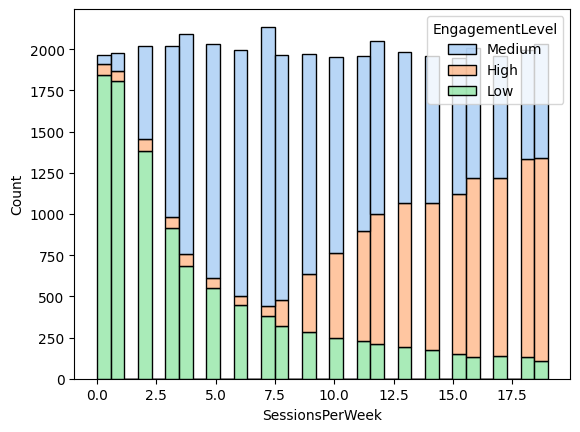

In [2607]:
sns.histplot(data=df, x='SessionsPerWeek',hue='EngagementLevel',multiple='stack',palette='pastel')
plt.show()

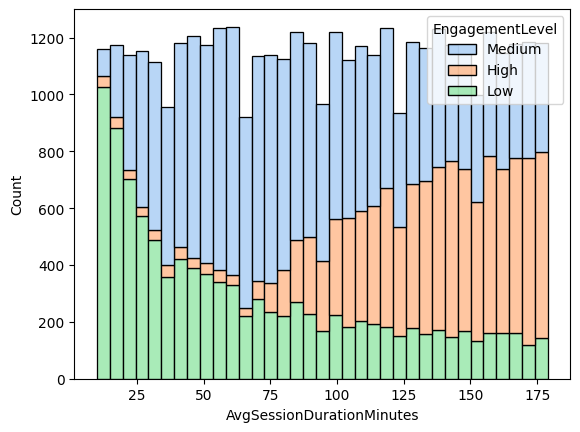

In [2608]:
sns.histplot(data=df, x='AvgSessionDurationMinutes',hue='EngagementLevel',multiple='stack',palette='pastel')
plt.show()

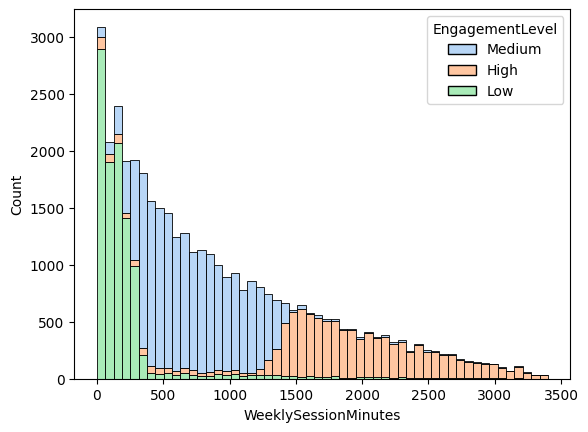

In [2609]:
df['WeeklySessionMinutes'] = df['SessionsPerWeek'] * df['AvgSessionDurationMinutes']
sns.histplot(data=df, x='WeeklySessionMinutes',hue='EngagementLevel',multiple='stack',palette='pastel')
plt.show()

In [2610]:
df['PlayerLevel'].value_counts()

PlayerLevel
14    449
16    444
19    441
48    440
36    440
     ... 
65    373
62    370
30    366
84    357
41    355
Name: count, Length: 99, dtype: int64

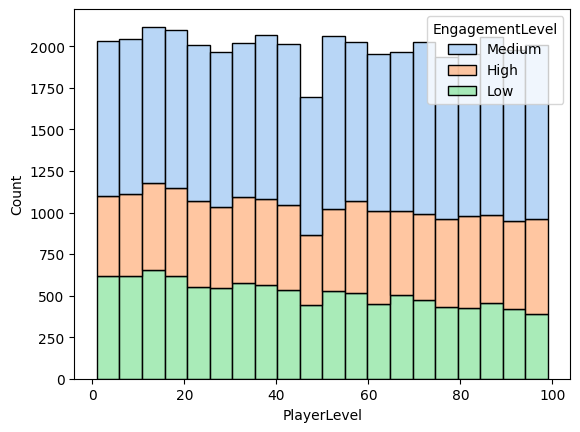

In [2611]:
sns.histplot(data=df, x='PlayerLevel',hue='EngagementLevel',multiple='stack',palette='pastel',bins=20)
plt.show()

In [2612]:
df['AchievementsUnlocked'].value_counts().head()

AchievementsUnlocked
32    870
18    842
39    842
8     840
48    837
Name: count, dtype: int64

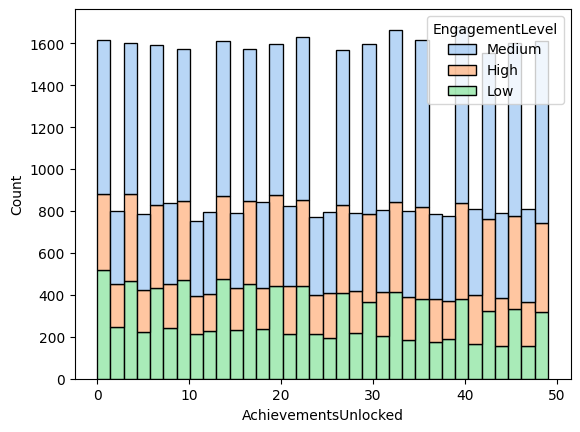

In [2613]:
sns.histplot(data=df, x='AchievementsUnlocked',hue='EngagementLevel',multiple='stack',palette='pastel')
plt.show()

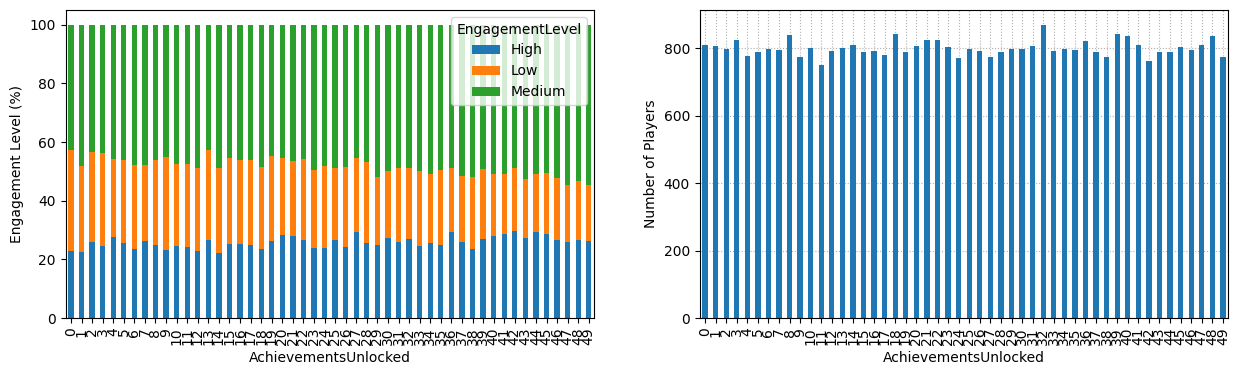

In [2614]:
plt.figure(figsize=(15, 4))

x = 'AchievementsUnlocked'

ax1 = plt.subplot(1, 2, 1)

dff = pd.crosstab(df[x], df['EngagementLevel'])
dff = dff.div(dff.sum(axis=1), axis=0) * 100

ax1 = dff.plot(kind='bar', stacked=True, ax=ax1)

# Formatting the plot
ax1.set_xlabel('AchievementsUnlocked')
ax1.set_ylabel('Engagement Level (%)')

ax2 = plt.subplot(1, 2, 2)
df.value_counts(x).sort_index().plot(kind='bar', ax=ax2)
ax2.grid(linestyle=':')
ax2.set_axisbelow(True)
ax2.set_xlabel('AchievementsUnlocked')
ax2.set_ylabel('Number of Players')

# Show the plot
plt.show()

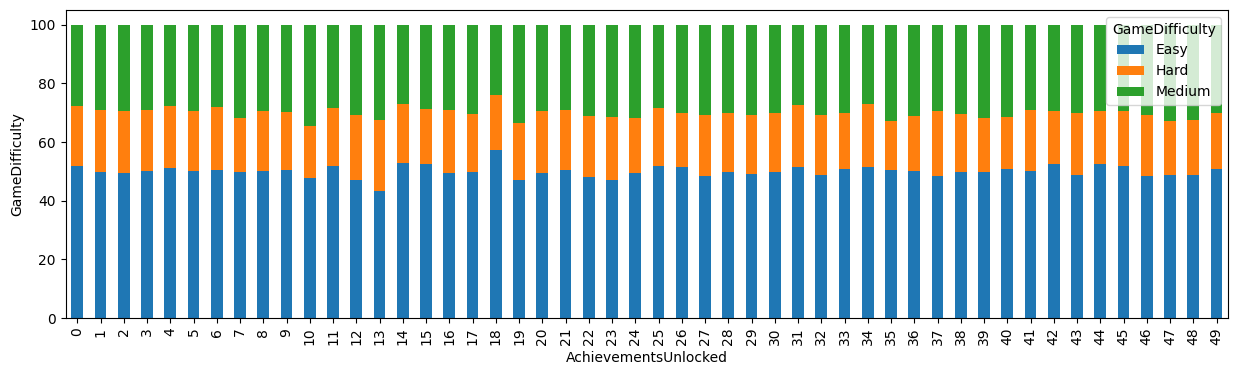

In [2615]:
plt.figure(figsize=(15, 4))

x = 'AchievementsUnlocked'

ax1 = plt.subplot(1,1,1)

dff = pd.crosstab(df[x], df['GameDifficulty'])
dff = dff.div(dff.sum(axis=1), axis=0) * 100

dff.plot(kind='bar', stacked=True, ax=ax1)

# Formatting the plot
ax1.set_xlabel('AchievementsUnlocked')
ax1.set_ylabel('GameDifficulty')

plt.show()

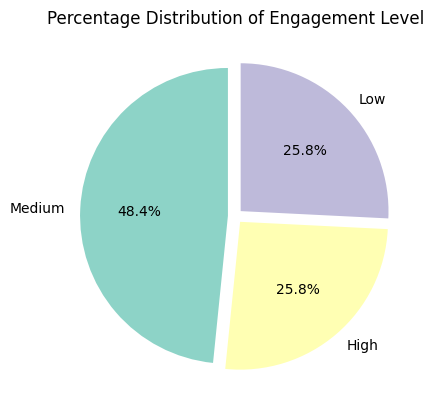

In [2616]:
df['EngagementLevel'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3'), startangle=90, explode=[0.05]*df['EngagementLevel'].nunique())
plt.ylabel('')
plt.title(f'Percentage Distribution of Engagement Level')
plt.show()

In [2617]:
df[df['PlayTimeHours']*60 != df['AvgSessionDurationMinutes']]

PlayerID  Age  Gender Location   GameGenre  PlayTimeHours  \
0          9000   43    Male    Other    Strategy      16.271119   
1          9001   29  Female      USA    Strategy       5.525961   
2          9002   22  Female      USA      Sports       8.223755   
3          9003   35    Male      USA      Action       5.265351   
4          9004   33    Male   Europe      Action      15.531945   
...         ...  ...     ...      ...         ...            ...   
40029     49029   32    Male      USA    Strategy      20.619662   
40030     49030   44  Female    Other  Simulation      13.539280   
40031     49031   15  Female      USA         RPG       0.240057   
40032     49032   34    Male      USA      Sports      14.017818   
40033     49033   19    Male      USA      Sports      10.083804   

       InGamePurchases GameDifficulty  SessionsPerWeek  \
0                    0         Medium                6   
1                    0         Medium                5   
2                    0           Easy               16   
3                    1           Easy                9   
4                    0         Medium                2   
...                ...            ...              ...   
40029                0           Easy                4   
40030                0           Hard               19   
40031                1           Easy               10   
40032                1         Medium                3   
40033                0           Easy               13   

       AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked  \
0                            108           79                    25   
1                            144           11                    10   
2                            142           35                    41   
3                             85           57                    47   
4                            131           95                    37   
...                          ...          ...                   ...   
40029                         75           85                    14   
40030                        114           71                    27   
40031                        176           29                     1   
40032                        128           70                    10   
40033                         84           72                    39   

      EngagementLevel  WeeklySessionMinutes  
0              Medium                   648  
1              Medium                   720  
2                High                  2272  
3              Medium                   765  
4              Medium                   262  
...               ...                   ...  
40029          Medium                   300  
40030            High                  2166  
40031            High                  1760  
40032          Medium                   384  
40033          Medium                  1092  

[40034 rows x 14 columns]

In [2618]:
df['PlayTimeMinutes'] = df['PlayTimeHours']*60

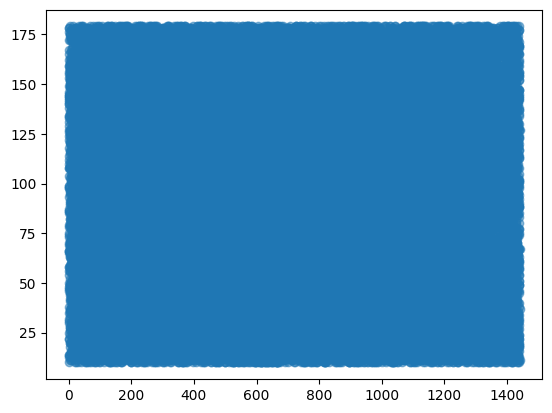

In [2619]:
plt.scatter(data=df, x='PlayTimeMinutes',y='AvgSessionDurationMinutes',alpha=0.5)
plt.show()

In [2620]:
df[df['PlayTimeHours']*60 != df['WeeklySessionMinutes']]

PlayerID  Age  Gender Location   GameGenre  PlayTimeHours  \
0          9000   43    Male    Other    Strategy      16.271119   
1          9001   29  Female      USA    Strategy       5.525961   
2          9002   22  Female      USA      Sports       8.223755   
3          9003   35    Male      USA      Action       5.265351   
4          9004   33    Male   Europe      Action      15.531945   
...         ...  ...     ...      ...         ...            ...   
40029     49029   32    Male      USA    Strategy      20.619662   
40030     49030   44  Female    Other  Simulation      13.539280   
40031     49031   15  Female      USA         RPG       0.240057   
40032     49032   34    Male      USA      Sports      14.017818   
40033     49033   19    Male      USA      Sports      10.083804   

       InGamePurchases GameDifficulty  SessionsPerWeek  \
0                    0         Medium                6   
1                    0         Medium                5   
2                    0           Easy               16   
3                    1           Easy                9   
4                    0         Medium                2   
...                ...            ...              ...   
40029                0           Easy                4   
40030                0           Hard               19   
40031                1           Easy               10   
40032                1         Medium                3   
40033                0           Easy               13   

       AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked  \
0                            108           79                    25   
1                            144           11                    10   
2                            142           35                    41   
3                             85           57                    47   
4                            131           95                    37   
...                          ...          ...                   ...   
40029                         75           85                    14   
40030                        114           71                    27   
40031                        176           29                     1   
40032                        128           70                    10   
40033                         84           72                    39   

      EngagementLevel  WeeklySessionMinutes  PlayTimeMinutes  
0              Medium                   648       976.267126  
1              Medium                   720       331.557683  
2                High                  2272       493.425315  
3              Medium                   765       315.921077  
4              Medium                   262       931.916671  
...               ...                   ...              ...  
40029          Medium                   300      1237.179745  
40030            High                  2166       812.356828  
40031            High                  1760        14.403413  
40032          Medium                   384       841.069079  
40033          Medium                  1092       605.028215  

[40034 rows x 15 columns]

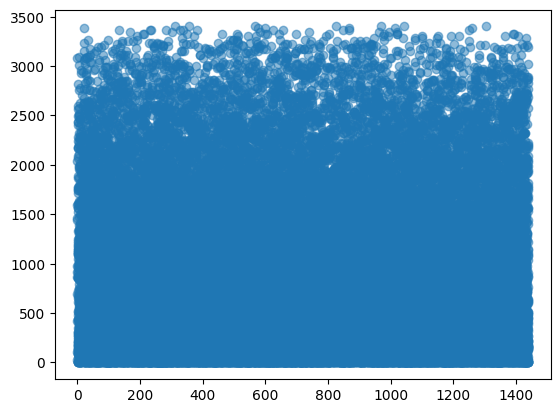

In [2621]:
plt.scatter(data=df, x='PlayTimeMinutes',y='WeeklySessionMinutes',alpha=0.5)
plt.show()

In [2622]:
df.drop('PlayTimeMinutes',axis=1,inplace=True)

In [2623]:
df['Minor'] = df['Age'].apply(lambda x: 0 if x>18 else 1)

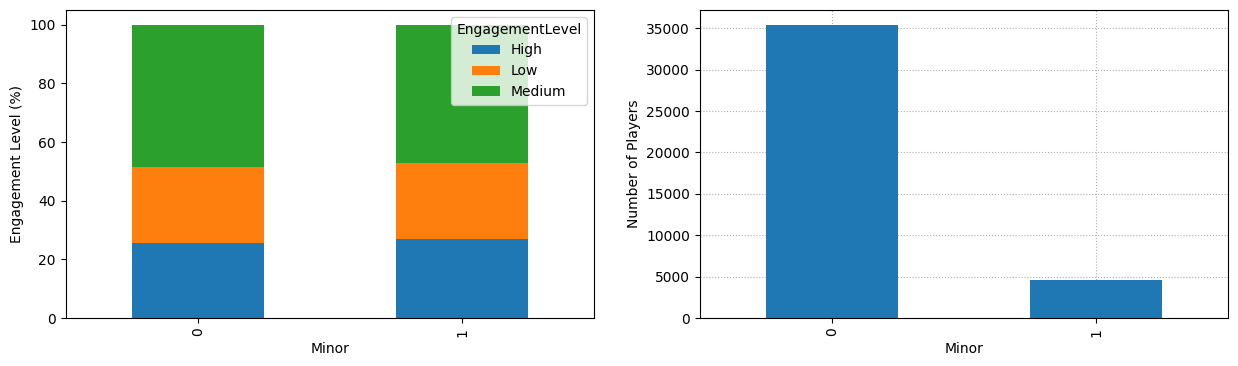

In [2624]:
plt.figure(figsize=(15, 4))

x = 'Minor'

ax1 = plt.subplot(1, 2, 1)

dff = pd.crosstab(df[x], df['EngagementLevel'])
dff = dff.div(dff.sum(axis=1), axis=0) * 100

ax1 = dff.plot(kind='bar', stacked=True, ax=ax1)

# Formatting the plot
ax1.set_xlabel('Minor')
ax1.set_ylabel('Engagement Level (%)')

ax2 = plt.subplot(1, 2, 2)
df.value_counts(x).sort_index().plot(kind='bar', ax=ax2)
ax2.grid(linestyle=':')
ax2.set_axisbelow(True)
ax2.set_xlabel('Minor')
ax2.set_ylabel('Number of Players')

# Show the plot
plt.show()

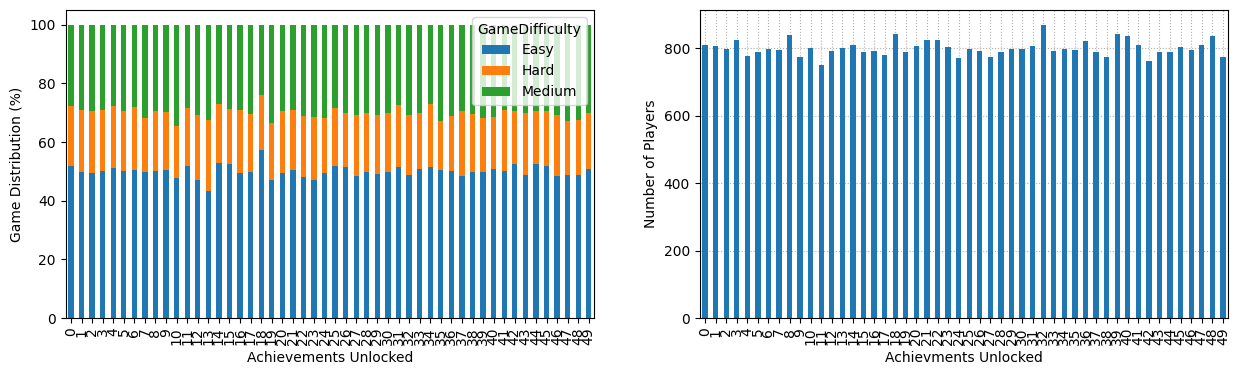

In [2625]:
plt.figure(figsize=(15, 4))

x = 'AchievementsUnlocked'

ax1 = plt.subplot(1, 2, 1)

dff = pd.crosstab(df[x], df['GameDifficulty'])
dff = dff.div(dff.sum(axis=1), axis=0) * 100

ax1 = dff.plot(kind='bar', stacked=True, ax=ax1)

# Formatting the plot
ax1.set_xlabel('Achievements Unlocked')
ax1.set_ylabel('Game Distribution (%)')

ax2 = plt.subplot(1, 2, 2)
df.value_counts(x).sort_index().plot(kind='bar', ax=ax2)
ax2.grid(linestyle=':')
ax2.set_axisbelow(True)
ax2.set_xlabel('Achievments Unlocked')
ax2.set_ylabel('Number of Players')

# Show the plot
plt.show()

In [2699]:
df[df['GameDifficulty']=='Hard']['AchievementsUnlocked'].mean()

24.190934065934066

In [2689]:
df1 = df.copy()

df1['GameDifficulty'] = df1['GameDifficulty'].astype('category').cat.codes  # Convert A=0, B=1, C=2

# Select relevant columns
interaction_data = df1[['AchievementsUnlocked', 'GameDifficulty']]

# Apply PolynomialFeatures to generate interaction term
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction_terms = poly.fit_transform(interaction_data)

interaction_terms = pd.DataFrame(interaction_terms)
interaction_terms.columns = ['AchievementsUnlocked_Easy','AchievementsUnlocked_Medium','AchievementsUnlocked_Hard']

In [2691]:
interaction_terms.head()

AchievementsUnlocked_Easy  AchievementsUnlocked_Medium  \
0                       25.0                          2.0   
1                       10.0                          2.0   
2                       41.0                          0.0   
3                       47.0                          0.0   
4                       37.0                          2.0   

   AchievementsUnlocked_Hard  
0                       50.0  
1                       20.0  
2                        0.0  
3                        0.0  
4                       74.0

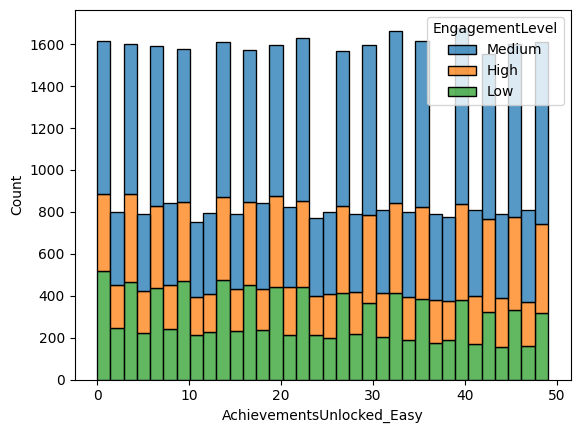

In [2693]:
df1['AchievementsUnlocked_Easy'] = interaction_terms['AchievementsUnlocked_Easy']
df1['AchievementsUnlocked_Medium'] = interaction_terms['AchievementsUnlocked_Medium']
df1['AchievementsUnlocked_Hard'] = interaction_terms['AchievementsUnlocked_Hard']

sns.histplot(data=df1,x='AchievementsUnlocked_Easy',hue='EngagementLevel',multiple='stack')
plt.show()

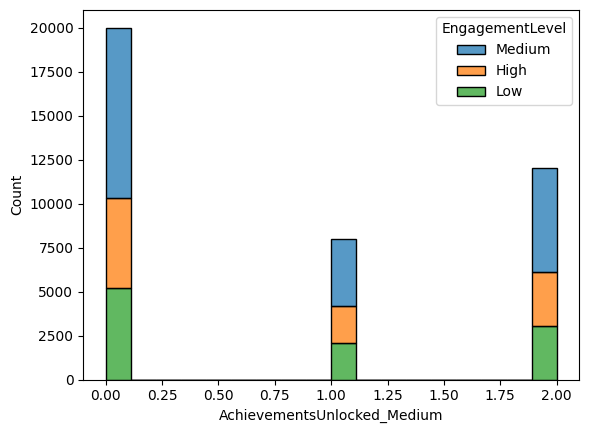

In [2695]:
sns.histplot(data=df1,x='AchievementsUnlocked_Medium',hue='EngagementLevel',multiple='stack')
plt.show()

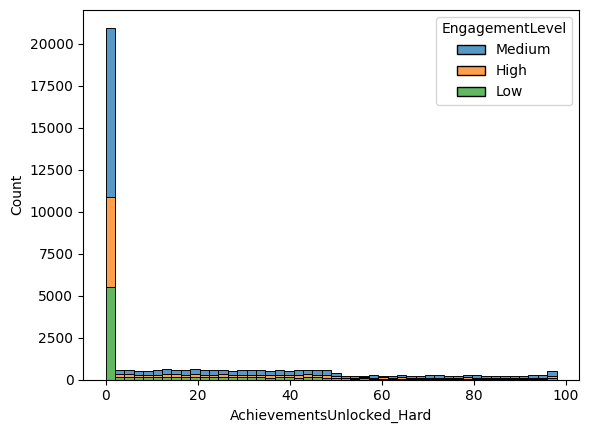

In [2697]:
sns.histplot(data=df1,x='AchievementsUnlocked_Hard',hue='EngagementLevel',multiple='stack')
plt.show()

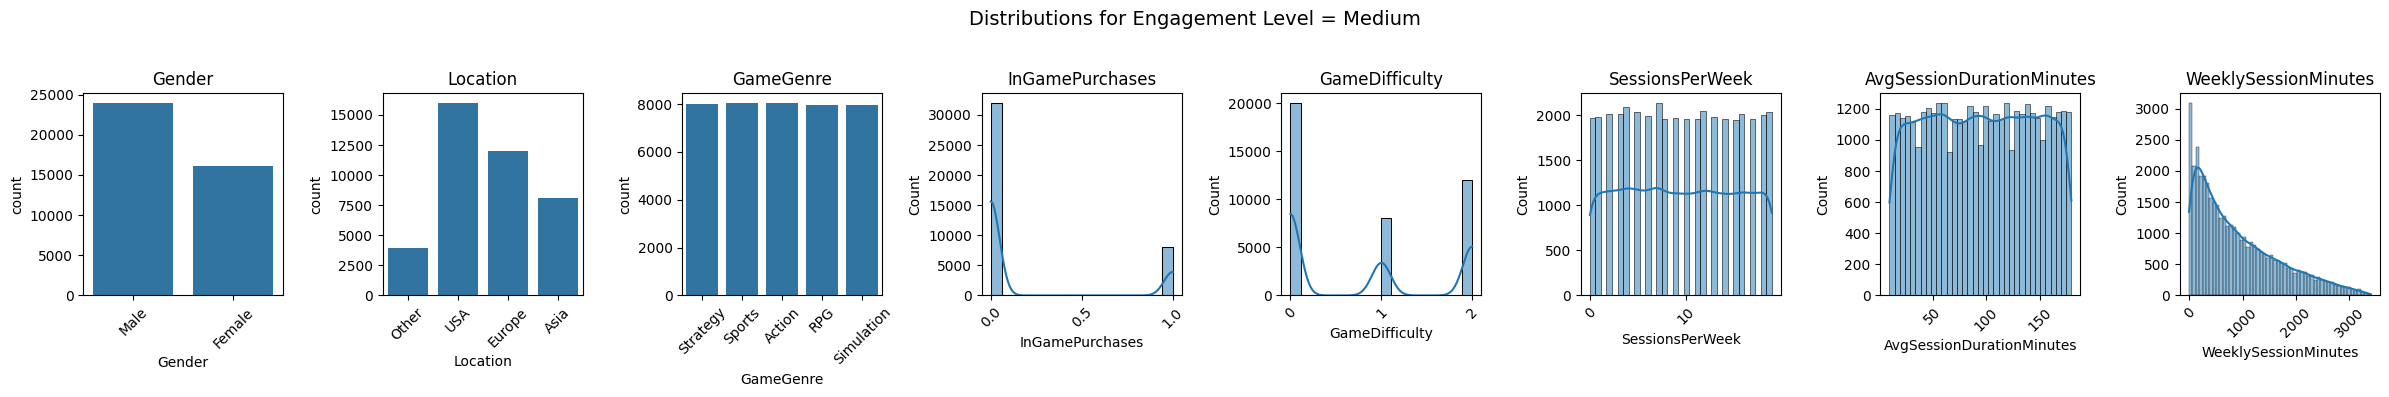

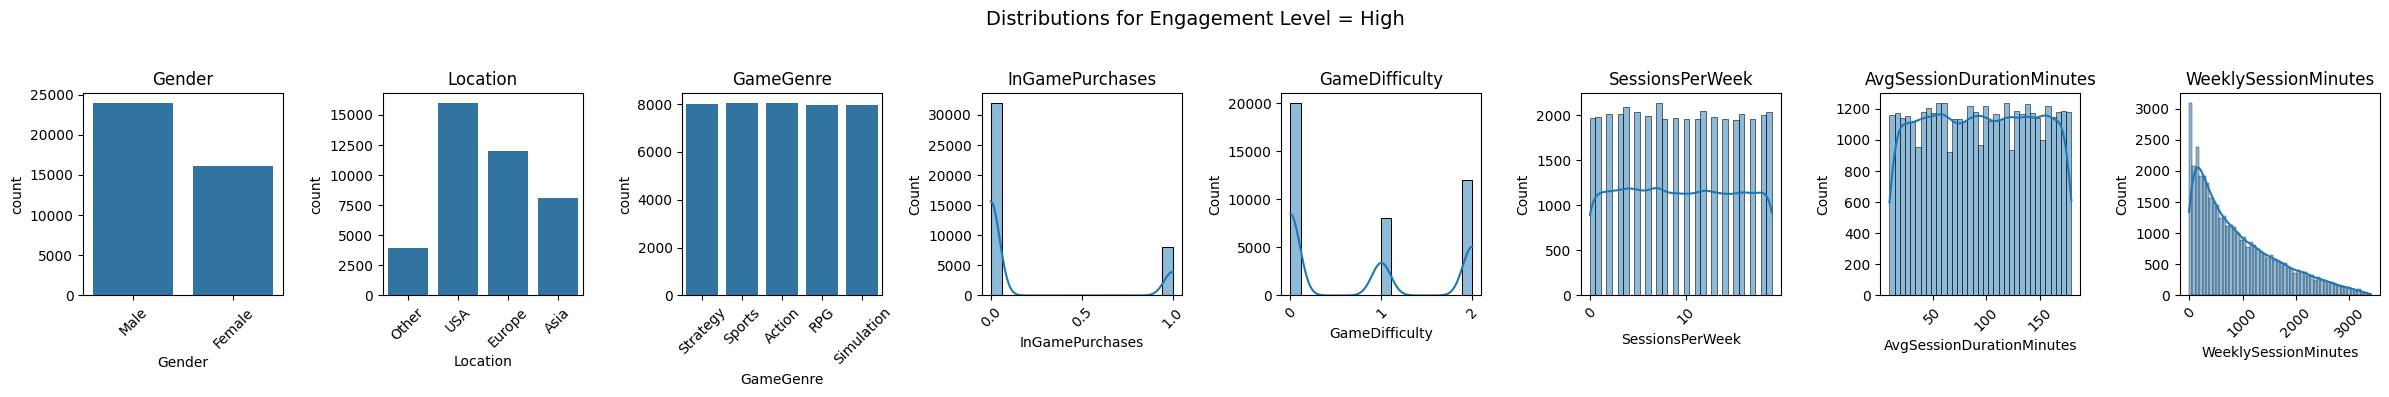

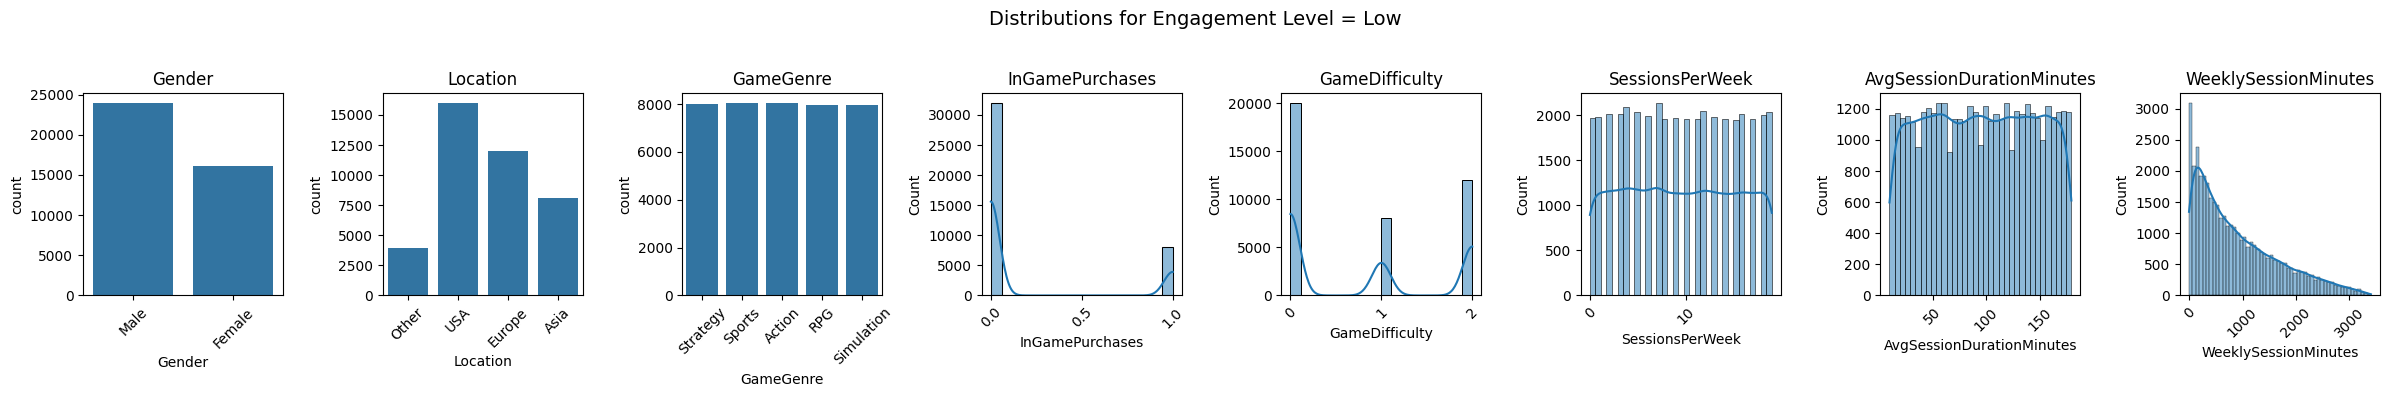

In [2344]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['Gender', 'Location', 'GameGenre', 'InGamePurchases', 'GameDifficulty',
        'SessionsPerWeek', 'AvgSessionDurationMinutes', 'WeeklySessionMinutes']

for label in df['EngagementLevel'].unique():
    df_filtered = df[df['EngagementLevel'] == label]  
    
    fig, axes = plt.subplots(1, 8, figsize=(24, 4))  
    fig.suptitle(f'Distributions for Engagement Level = {label}', fontsize=14)

    for i, col in enumerate(cols):
        ax = axes[i]  # Get the current axis
        
        if df_filtered[col].dtype.kind in 'if':  
            sns.histplot(data=df, x=col, ax=ax, kde=True)
        else:  
            sns.countplot(data=df, x=col, ax=ax)
        
        ax.set_title(col)
        ax.tick_params(axis='x', rotation=45)  # Rotate labels for readability

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
    plt.show()


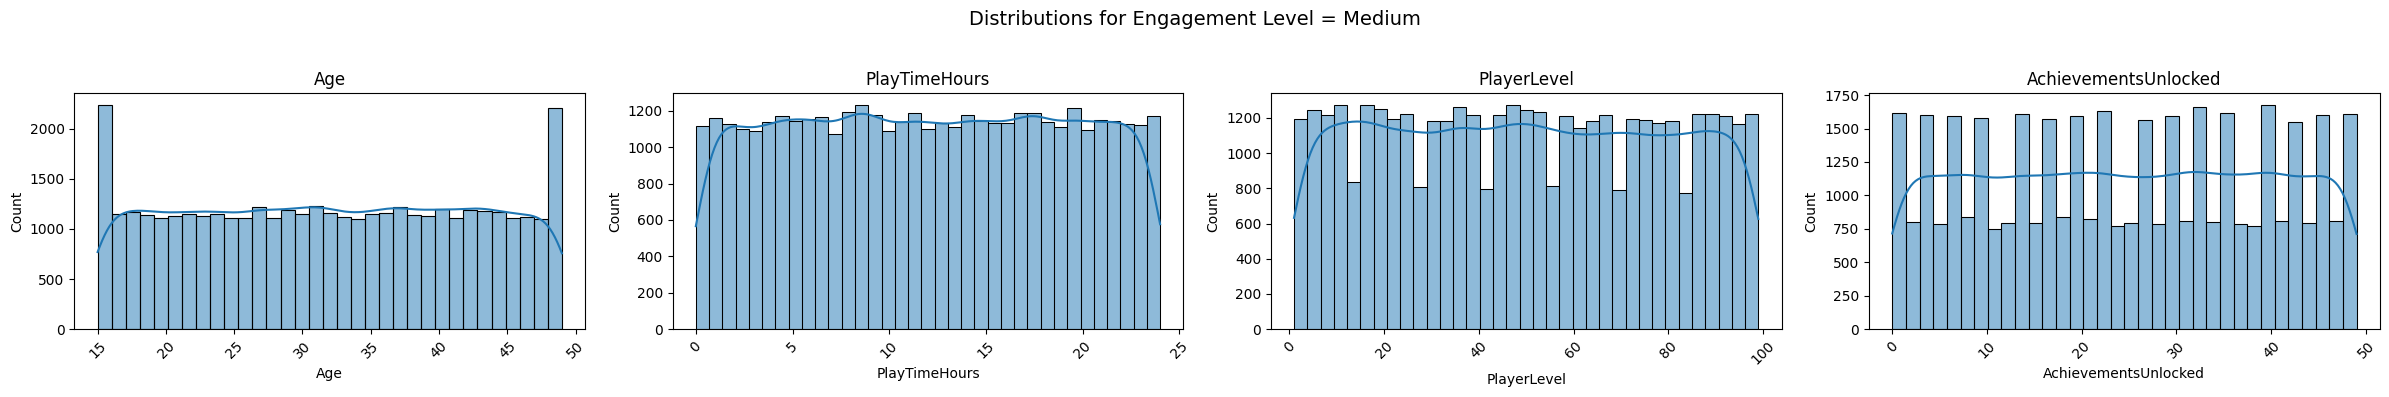

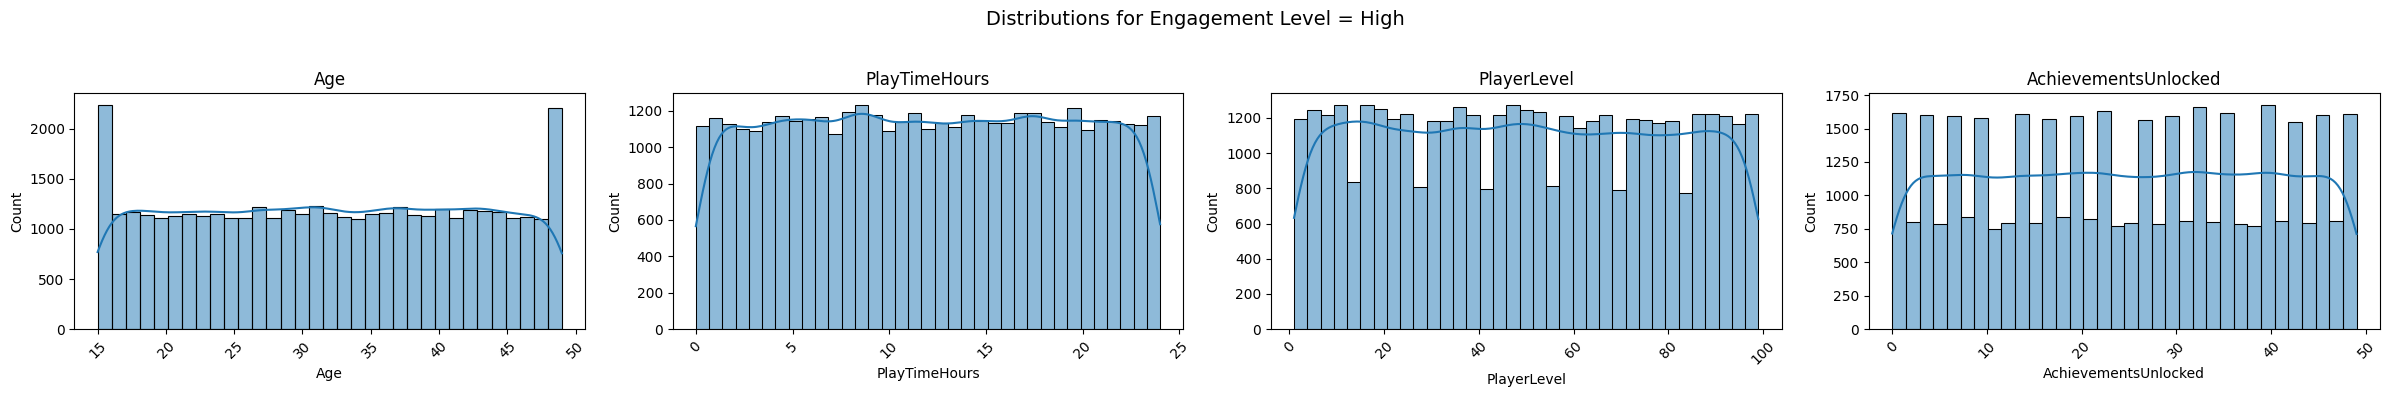

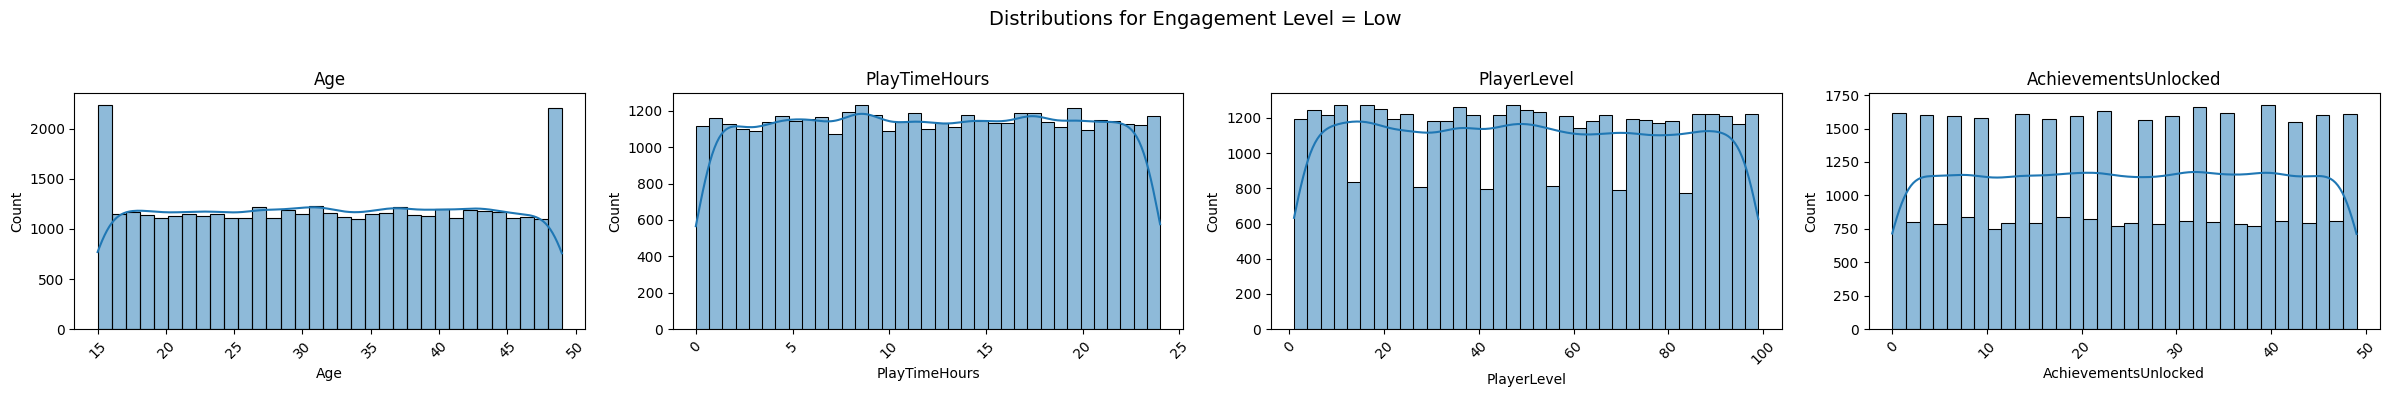

In [2345]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['Age', 'PlayTimeHours', 'PlayerLevel', 'AchievementsUnlocked']

for label in df['EngagementLevel'].unique():
    df_filtered = df[df['EngagementLevel'] == label]  
    
    fig, axes = plt.subplots(1, 4, figsize=(24, 4))  
    fig.suptitle(f'Distributions for Engagement Level = {label}', fontsize=14)

    for i, col in enumerate(cols):
        ax = axes[i]  # Get the current axis
        
        if df_filtered[col].dtype.kind in 'if':  
            sns.histplot(data=df, x=col, ax=ax, kde=True)
        else:  
            sns.countplot(data=df, x=col, ax=ax)
        
        ax.set_title(col)
        ax.tick_params(axis='x', rotation=45)  # Rotate labels for readability

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
    plt.show()

In [2347]:
df.head()

PlayerID  Age  Gender Location GameGenre  PlayTimeHours  InGamePurchases  \
0      9000   43    Male    Other  Strategy      16.271119                0   
1      9001   29  Female      USA  Strategy       5.525961                0   
2      9002   22  Female      USA    Sports       8.223755                0   
3      9003   35    Male      USA    Action       5.265351                1   
4      9004   33    Male   Europe    Action      15.531945                0   

   GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0               2                6                        108           79   
1               2                5                        144           11   
2               0               16                        142           35   
3               0                9                         85           57   
4               2                2                        131           95   

   AchievementsUnlocked EngagementLevel  WeeklySessionMinutes  Minor  
0                    25          Medium                   648      0  
1                    10          Medium                   720      0  
2                    41            High                  2272      0  
3                    47          Medium                   765      0  
4                    37          Medium                   262      0

In [2348]:
df_corr = pd.get_dummies(df, columns=['Gender','Location','GameGenre','GameDifficulty','EngagementLevel'], dtype=int, drop_first=False)
df_corr = df_corr.corr()

<Figure size 1000x1000 with 0 Axes>

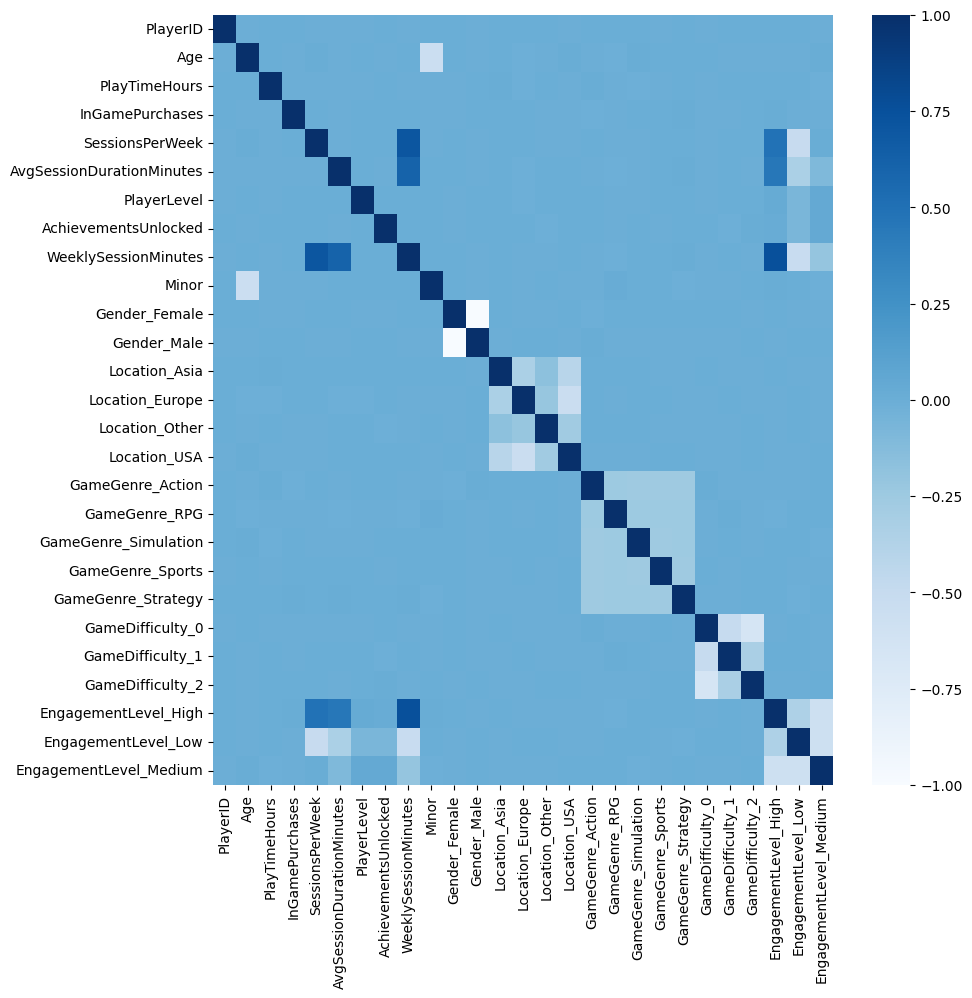

In [2373]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,cmap='Blues')
plt.show()

In [2350]:
df_pca = pd.get_dummies(df, columns=['Gender','Location','GameGenre','GameDifficulty','EngagementLevel'], dtype=int)

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(df_pca)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

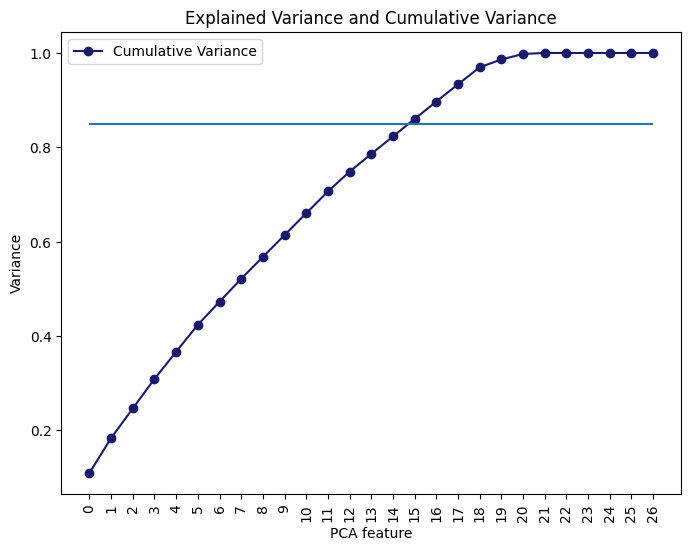

In [2369]:
plt.figure(figsize=(8,6))

# Get PCA features
features = range(pca.n_components_)

# Bar plot for individual explained variance
#plt.bar(features, pca.explained_variance_, alpha=0.5, label='Individual Variance')

# Line plot for cumulative explained variance
plt.plot(features, np.cumsum(pca.explained_variance_ratio_), marker='o', color='#191970', label='Cumulative Variance')
plt.hlines(y=0.85,xmin=0,xmax=26)

# Labels and formatting
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features, rotation=90)
plt.legend()
plt.title('Explained Variance and Cumulative Variance')
plt.show()

In [2352]:
df_pca

PlayerID  Age  PlayTimeHours  InGamePurchases  SessionsPerWeek  \
0          9000   43      16.271119                0                6   
1          9001   29       5.525961                0                5   
2          9002   22       8.223755                0               16   
3          9003   35       5.265351                1                9   
4          9004   33      15.531945                0                2   
...         ...  ...            ...              ...              ...   
40029     49029   32      20.619662                0                4   
40030     49030   44      13.539280                0               19   
40031     49031   15       0.240057                1               10   
40032     49032   34      14.017818                1                3   
40033     49033   19      10.083804                0               13   

       AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked  \
0                            108           79                    25   
1                            144           11                    10   
2                            142           35                    41   
3                             85           57                    47   
4                            131           95                    37   
...                          ...          ...                   ...   
40029                         75           85                    14   
40030                        114           71                    27   
40031                        176           29                     1   
40032                        128           70                    10   
40033                         84           72                    39   

       WeeklySessionMinutes  Minor  ...  GameGenre_RPG  GameGenre_Simulation  \
0                       648      0  ...              0                     0   
1                       720      0  ...              0                     0   
2                      2272      0  ...              0                     0   
3                       765      0  ...              0                     0   
4                       262      0  ...              0                     0   
...                     ...    ...  ...            ...                   ...   
40029                   300      0  ...              0                     0   
40030                  2166      0  ...              0                     1   
40031                  1760      1  ...              1                     0   
40032                   384      0  ...              0                     0   
40033                  1092      0  ...              0                     0   

       GameGenre_Sports  GameGenre_Strategy  GameDifficulty_0  \
0                     0                   1                 0   
1                     0                   1                 0   
2                     1                   0                 1   
3                     0                   0                 1   
4                     0                   0                 0   
...                 ...                 ...               ...   
40029                 0                   1                 1   
40030                 0                   0                 0   
40031                 0                   0                 1   
40032                 1                   0                 0   
40033                 1                   0                 1   

       GameDifficulty_1  GameDifficulty_2  EngagementLevel_High  \
0                     0                 1                     0   
1                     0                 1                     0   
2                     0                 0                     1   
3                     0                 0                     0   
4                     0                 1                     0   
...                 ...               ...                   ...   
40029                 0                 0                     0   

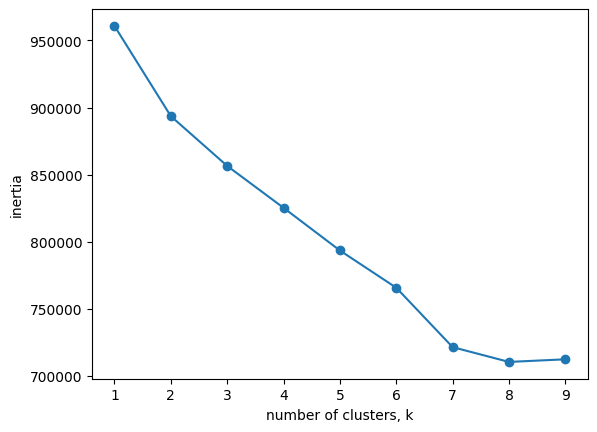

In [2393]:
df_pca = pd.get_dummies(df, columns=['Gender','Location','GameGenre','GameDifficulty','EngagementLevel'], dtype=int)
df_clustering = df_pca.drop(['EngagementLevel_High','EngagementLevel_Medium','EngagementLevel_Low'],axis=1)

ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    scaler = StandardScaler()
    df_clustering = scaler.fit_transform(df_clustering)
    
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(df_clustering)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

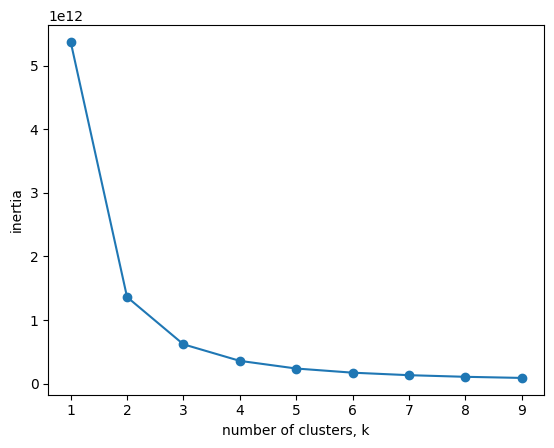

In [1996]:
df_pca = pd.get_dummies(df, columns=['Gender','Location','GameGenre','GameDifficulty','EngagementLevel'], dtype=int)
df_clustering = df_pca.drop(['EngagementLevel_High','EngagementLevel_Medium','EngagementLevel_Low'],axis=1)

pca = PCA(n_components = 15)
pca.fit(df_clustering)

# Transform the data to the new PCA space
df_clustering = pca.transform(df_clustering)
df_clustering = pd.DataFrame(df_clustering)

ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(df_clustering)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [2397]:
df_pca = pd.get_dummies(df, columns=['Gender','Location','GameGenre','GameDifficulty','EngagementLevel'], dtype=int)
df_clustering = df_pca.drop(['EngagementLevel_High','EngagementLevel_Medium','EngagementLevel_Low'],axis=1)

scaler = StandardScaler()

# Create a PCA instance: pca
kmeans = KMeans(n_clusters=7)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

# Fit the pipeline to 'samples'
labels_kmeans =pipeline.fit_predict(df_clustering)

df_clustering['Label_KMeans'] = labels_kmeans

In [2399]:
df['Label_KMeans'] = labels_kmeans
df.head()

PlayerID  Age  Gender Location GameGenre  PlayTimeHours  InGamePurchases  \
0      9000   43    Male    Other  Strategy      16.271119                0   
1      9001   29  Female      USA  Strategy       5.525961                0   
2      9002   22  Female      USA    Sports       8.223755                0   
3      9003   35    Male      USA    Action       5.265351                1   
4      9004   33    Male   Europe    Action      15.531945                0   

   GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0               2                6                        108           79   
1               2                5                        144           11   
2               0               16                        142           35   
3               0                9                         85           57   
4               2                2                        131           95   

   AchievementsUnlocked EngagementLevel  WeeklySessionMinutes  Minor  \
0                    25          Medium                   648      0   
1                    10          Medium                   720      0   
2                    41            High                  2272      0   
3                    47          Medium                   765      0   
4                    37          Medium                   262      0   

   Label_KMeans  
0             6  
1             2  
2             2  
3             0  
4             5

In [2401]:
df['Label_KMeans'].value_counts()

Label_KMeans
0    9547
1    7100
5    5798
2    5738
3    4085
6    3935
4    3831
Name: count, dtype: int64

In [2403]:
df_pca = pd.get_dummies(df, columns=['Gender','Location','GameGenre','GameDifficulty','EngagementLevel'], dtype=int)
df_reduced = df_pca.drop(['EngagementLevel_High','EngagementLevel_Medium','EngagementLevel_Low'],axis=1)

pca = PCA(n_components = 2)
pca.fit(df_reduced)

# Transform the data to the new PCA space
df_reduced = pca.transform(df_reduced)
df_reduced = pd.DataFrame(df_reduced)
df_reduced['Label_KMeans'] = labels_kmeans
df_reduced['EngagementLevel'] = df['EngagementLevel']
df_reduced.head()

0            1  Label_KMeans EngagementLevel
0 -20016.421883  -255.203901             6          Medium
1 -20015.444210  -181.891253             2          Medium
2 -20014.925288  1368.931830             2            High
3 -20013.457789  -139.157695             0          Medium
4 -20012.302391  -640.052069             5          Medium

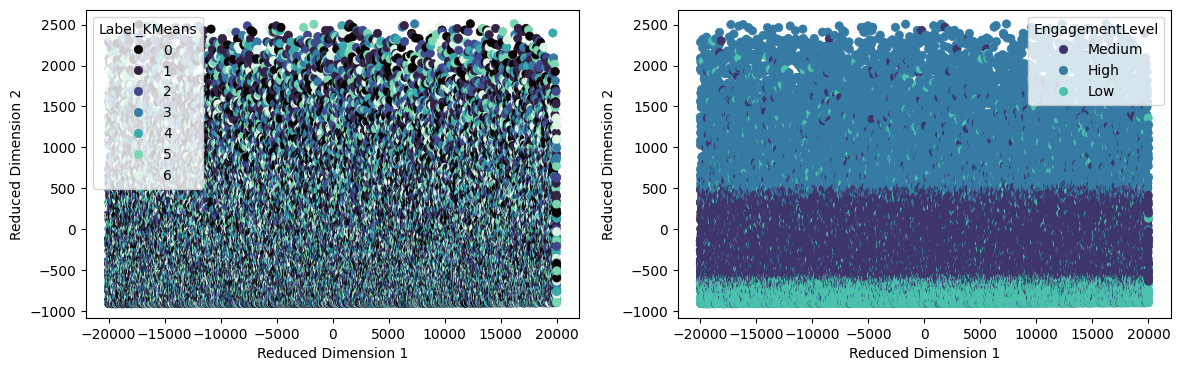

In [2405]:
plt.figure(figsize=(14,4))

ax1 = plt.subplot(1, 2, 1)

ax1 = sns.scatterplot(x=0,y=1,data=df_reduced, hue='Label_KMeans', edgecolor=None,palette='mako')
ax1.set_xlabel("Reduced Dimension 1")
ax1.set_ylabel("Reduced Dimension 2")

ax1 = plt.subplot(1, 2, 2)
ax2 = sns.scatterplot(x=0,y=1,data=df_reduced, hue='EngagementLevel', edgecolor=None,palette='mako')
ax2.set_xlabel("Reduced Dimension 1")
ax2.set_ylabel("Reduced Dimension 2")
plt.show()

In [2407]:
scaler = StandardScaler()

# Create a PCA instance: pca
kmeans = KMeans(n_clusters=3)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

# Fit the pipeline to 'samples'
labels_kmeans =pipeline.fit_predict(df_clustering)

df_clustering['Label_KMeans'] = labels_kmeans

In [2409]:
df['Label_KMeans'] = labels_kmeans
df.head()

PlayerID  Age  Gender Location GameGenre  PlayTimeHours  InGamePurchases  \
0      9000   43    Male    Other  Strategy      16.271119                0   
1      9001   29  Female      USA  Strategy       5.525961                0   
2      9002   22  Female      USA    Sports       8.223755                0   
3      9003   35    Male      USA    Action       5.265351                1   
4      9004   33    Male   Europe    Action      15.531945                0   

   GameDifficulty  SessionsPerWeek  AvgSessionDurationMinutes  PlayerLevel  \
0               2                6                        108           79   
1               2                5                        144           11   
2               0               16                        142           35   
3               0                9                         85           57   
4               2                2                        131           95   

   AchievementsUnlocked EngagementLevel  WeeklySessionMinutes  Minor  \
0                    25          Medium                   648      0   
1                    10          Medium                   720      0   
2                    41            High                  2272      0   
3                    47          Medium                   765      0   
4                    37          Medium                   262      0   

   Label_KMeans  
0             1  
1             2  
2             2  
3             1  
4             1

In [2411]:
df['Label_KMeans'].value_counts()

Label_KMeans
1    21251
2    14228
0     4555
Name: count, dtype: int64

In [2413]:
df_pca = pd.get_dummies(df, columns=['Gender','Location','GameGenre','GameDifficulty','EngagementLevel'], dtype=int)
df_reduced = df_pca.drop(['EngagementLevel_High','EngagementLevel_Medium','EngagementLevel_Low'],axis=1)

pca = PCA(n_components = 2)
pca.fit(df_reduced)

# Transform the data to the new PCA space
df_reduced = pca.transform(df_reduced)
df_reduced = pd.DataFrame(df_reduced)
df_reduced['Label_KMeans'] = labels_kmeans
df_reduced['EngagementLevel'] = df['EngagementLevel']
df_reduced.head()

0            1  Label_KMeans EngagementLevel
0 -20016.421885  -255.203880             1          Medium
1 -20015.444210  -181.891253             2          Medium
2 -20014.925288  1368.931831             2            High
3 -20013.457788  -139.157711             1          Medium
4 -20012.302392  -640.052054             1          Medium

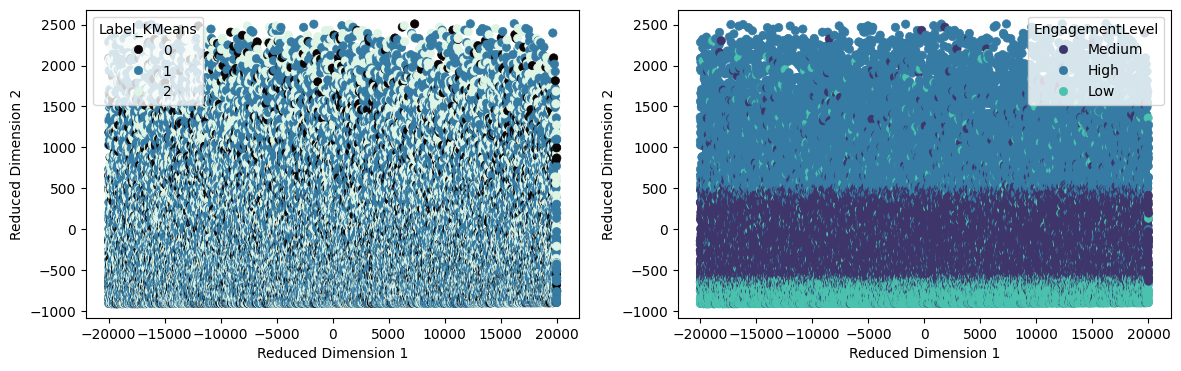

In [2415]:
plt.figure(figsize=(14,4))

ax1 = plt.subplot(1, 2, 1)

ax1 = sns.scatterplot(x=0,y=1,data=df_reduced, hue='Label_KMeans', edgecolor=None,palette='mako')
ax1.set_xlabel("Reduced Dimension 1")
ax1.set_ylabel("Reduced Dimension 2")

ax1 = plt.subplot(1, 2, 2)
ax2 = sns.scatterplot(x=0,y=1,data=df_reduced, hue='EngagementLevel', edgecolor=None,palette='mako')
ax2.set_xlabel("Reduced Dimension 1")
ax2.set_ylabel("Reduced Dimension 2")
plt.show()

## DBSCAN Clustering

In [ ]:
df_pca = pd.get_dummies(df, columns=['Gender','Location','GameGenre','GameDifficulty','EngagementLevel'], dtype=int)
df_clustering = df_pca.drop(['EngagementLevel_High','EngagementLevel_Medium','EngagementLevel_Low'],axis=1)

scaler = StandardScaler()

# Create a PCA instance: pca
dbscan = DBSCAN(eps=10, min_samples=20)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, dbscan)

# Fit the pipeline to 'samples'
labels_dbscan =pipeline.fit_predict(df_clustering)

df_clustering['Label_DBSCAN'] = labels_dbscan

In [ ]:
df_clustering['Label_DBSCAN'].value_counts()

In [ ]:
df_reduced['Label_DBSCAN'] = labels_dbscan
df_reduced['EngagementLevel'] = df['EngagementLevel']

plt.figure(figsize=(14,4))

ax1 = plt.subplot(1, 2, 1)

ax1 = sns.scatterplot(x=0,y=1,data=df_reduced, hue='Label_DBSCAN', edgecolor=None)

ax1 = plt.subplot(1, 2, 2)
ax2 = sns.scatterplot(x=0,y=1,data=df_reduced, hue='EngagementLevel', edgecolor=None)
plt.show()

In [2485]:
df_pca = pd.get_dummies(df, columns=['Gender','Location','GameGenre','GameDifficulty','EngagementLevel'], dtype=int)
df_reduced = df_pca.drop(['EngagementLevel_High', 'EngagementLevel_Medium', 'EngagementLevel_Low'], axis=1)

# Apply t-SNE
pca = PCA(n_components=2, random_state=42)
df_reduced_pca = pca.fit_transform(df_reduced)

# Convert to DataFrame
df_reduced_pca = pd.DataFrame(df_reduced_tsne, columns=['PCA1', 'PCA2'])

df_reduced_tsne.head()


PCA1         PCA2
0 -20016.421885  -255.203880
1 -20015.444210  -181.891253
2 -20014.925288  1368.931831
3 -20013.457788  -139.157711
4 -20012.302392  -640.052054

/var/folders/_5/5xzxgkc15jdg71sltgfrs8rm0000gn/T/ipykernel_12251/1088386359.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='PCA1', y='PCA2', palette='coolwarm',data=df_reduced_tsne)


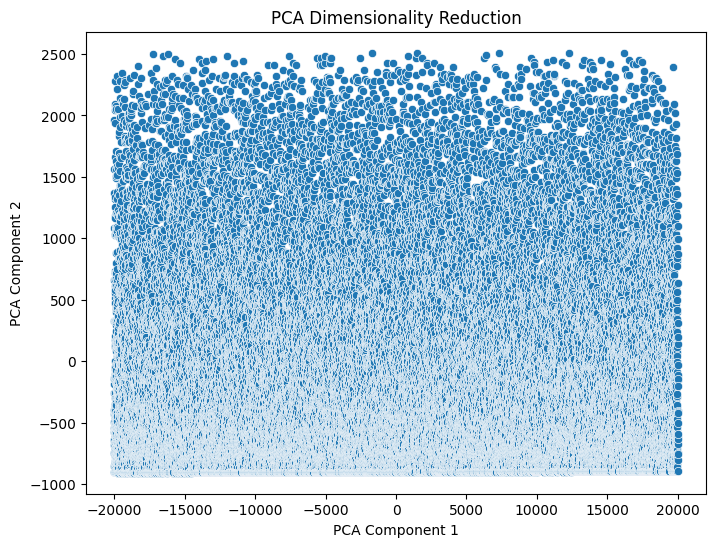

In [2487]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', palette='coolwarm',data=df_reduced_tsne)
plt.title("PCA Dimensionality Reduction")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [2489]:
df_pca = pd.get_dummies(df, columns=['Gender','Location','GameGenre','GameDifficulty','EngagementLevel'], dtype=int)
df_reduced = df_pca.drop(['EngagementLevel_High', 'EngagementLevel_Medium', 'EngagementLevel_Low'], axis=1)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
df_reduced_tsne = tsne.fit_transform(df_reduced)

# Convert to DataFrame
df_reduced_tsne = pd.DataFrame(df_reduced_tsne, columns=['t-SNE1', 't-SNE2'])

df_reduced_tsne.head()


t-SNE1     t-SNE2
0 -77.473999  34.590179
1 -74.423515  36.368755
2 -58.710976  46.339600
3 -74.277496  36.430840
4 -81.492393  32.192303

/var/folders/_5/5xzxgkc15jdg71sltgfrs8rm0000gn/T/ipykernel_12251/3638849602.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='t-SNE1', y='t-SNE2', palette='coolwarm',data=df_reduced_tsne)


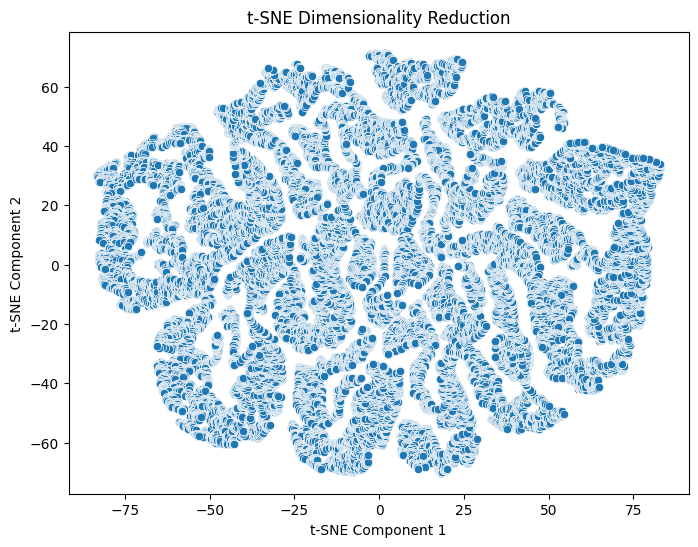

In [2490]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='t-SNE1', y='t-SNE2', palette='coolwarm',data=df_reduced_tsne)
plt.title("t-SNE Dimensionality Reduction")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

In [2709]:
df_subset = df[['Gender', 'Location', 'GameGenre',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'WeeklySessionMinutes']]

df_subset = pd.get_dummies(df_subset, columns=['Gender','Location','GameGenre','GameDifficulty'], dtype=int)

scaler = StandardScaler()

# Create a PCA instance: pca
kmeans = KMeans(n_clusters=3)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

# Fit the pipeline to 'samples'
labels_kmeans =pipeline.fit_predict(df_subset)

df_subset['Label_KMeans'] = labels_kmeans

df_subset.head()

InGamePurchases  SessionsPerWeek  AvgSessionDurationMinutes  \
0                0                6                        108   
1                0                5                        144   
2                0               16                        142   
3                1                9                         85   
4                0                2                        131   

   WeeklySessionMinutes  Gender_Female  Gender_Male  Location_Asia  \
0                   648              0            1              0   
1                   720              1            0              0   
2                  2272              1            0              0   
3                   765              0            1              0   
4                   262              0            1              0   

   Location_Europe  Location_Other  Location_USA  GameGenre_Action  \
0                0               1             0                 0   
1                0               0             1                 0   
2                0               0             1                 0   
3                0               0             1                 1   
4                1               0             0                 1   

   GameGenre_RPG  GameGenre_Simulation  GameGenre_Sports  GameGenre_Strategy  \
0              0                     0                 0                   1   
1              0                     0                 0                   1   
2              0                     0                 1                   0   
3              0                     0                 0                   0   
4              0                     0                 0                   0   

   GameDifficulty_Easy  GameDifficulty_Hard  GameDifficulty_Medium  \
0                    0                    0                      1   
1                    0                    0                      1   
2                    1                    0                      0   
3                    1                    0                      0   
4                    0                    0                      1   

   Label_KMeans  
0             2  
1             1  
2             1  
3             0  
4             2

In [2711]:
df_subset.groupby('Label_KMeans').agg('mean').reset_index()

Label_KMeans  InGamePurchases  SessionsPerWeek  AvgSessionDurationMinutes  \
0             0         0.201492         9.406085                  94.339536   
1             1         0.197823         9.517449                  94.982208   
2             2         0.204273         9.475890                  94.987446   

   WeeklySessionMinutes  Gender_Female  Gender_Male  Location_Asia  \
0            888.497527            0.0          1.0       0.203587   
1            905.010140            1.0          0.0       0.202240   
2            896.977552            0.0          1.0       0.200782   

   Location_Europe  Location_Other  Location_USA  GameGenre_Action  \
0         0.300059        0.099573      0.396781          0.209790   
1         0.296236        0.098289      0.403235          0.195894   
2         0.304456        0.097024      0.397739          0.198454   

   GameGenre_RPG  GameGenre_Simulation  GameGenre_Sports  GameGenre_Strategy  \
0       0.192859              0.199899          0.200821            0.196631   
1       0.201244              0.200187          0.201742            0.200933   
2       0.200865              0.197872          0.200283            0.202527   

   GameDifficulty_Easy  GameDifficulty_Hard  GameDifficulty_Medium  
0             1.000000             0.000000               0.000000  
1             0.502893             0.201182               0.295925  
2             0.000000             0.396907               0.603093

In [2713]:
df_subset = df[['Gender', 'Location', 'GameGenre',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'WeeklySessionMinutes']]

df_subset['Label_KMeans'] = labels_kmeans

/var/folders/_5/5xzxgkc15jdg71sltgfrs8rm0000gn/T/ipykernel_12251/3394536013.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Label_KMeans'] = labels_kmeans


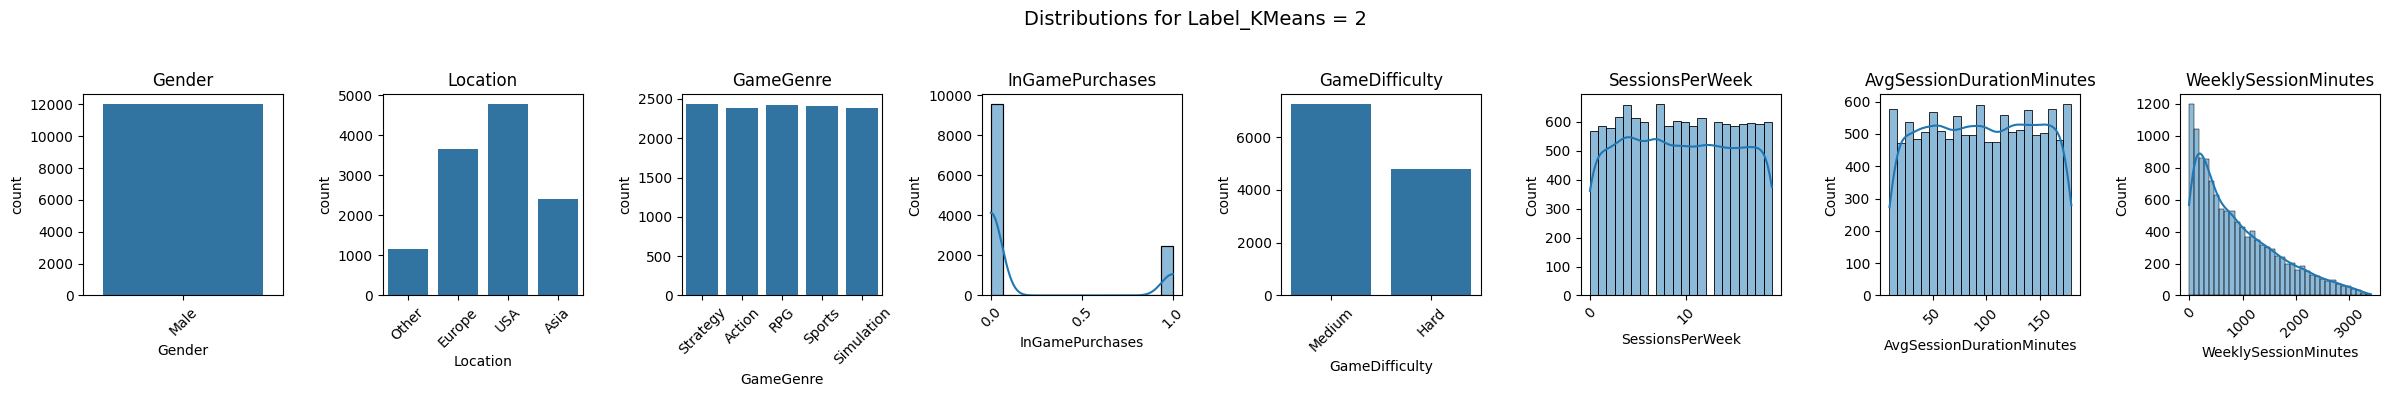

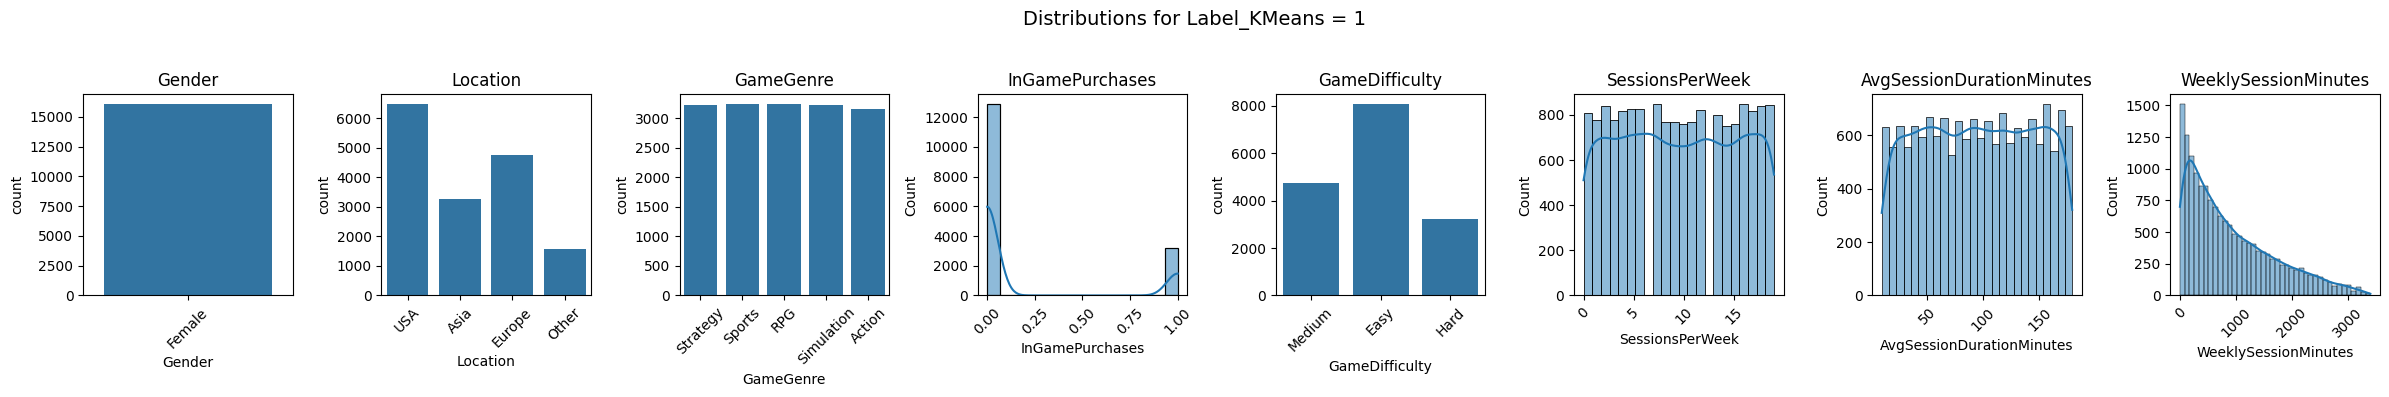

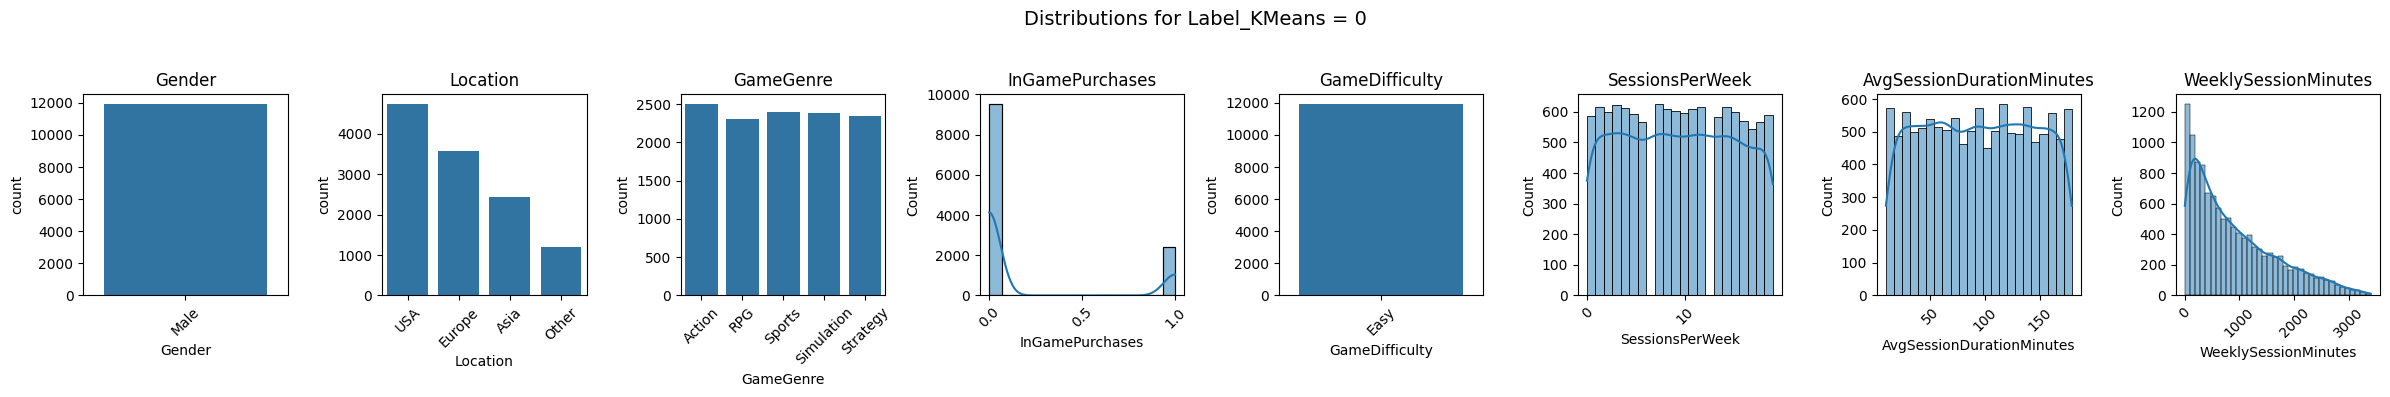

In [2715]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['Gender', 'Location', 'GameGenre', 'InGamePurchases', 'GameDifficulty',
        'SessionsPerWeek', 'AvgSessionDurationMinutes', 'WeeklySessionMinutes']

for label in df_subset['Label_KMeans'].unique():
    df_filtered = df_subset[df_subset['Label_KMeans'] == label]  # Filter by cluster
    
    fig, axes = plt.subplots(1, 8, figsize=(24, 4))  # 1 row, 8 columns
    fig.suptitle(f'Distributions for Label_KMeans = {label}', fontsize=14)

    for i, col in enumerate(cols):
        ax = axes[i]  # Get the current axis
        
        if df_filtered[col].dtype.kind in 'if':  # Numeric column
            sns.histplot(data=df_filtered, x=col, ax=ax, kde=True)
        else:  # Categorical column
            sns.countplot(data=df_filtered, x=col, ax=ax)
        
        ax.set_title(col)
        ax.tick_params(axis='x', rotation=45)  # Rotate labels for readability

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
    plt.show()


In [2718]:
df_cleaned = df.copy()
df_cleaned = pd.get_dummies(df_cleaned, columns=['Gender','Location','GameGenre','GameDifficulty'], dtype=int)
df_cleaned.drop(['PlayerID','PlayTimeHours'],axis=1,inplace=True)
df_cleaned['EngagementLevel'] = df_cleaned['EngagementLevel'].replace({'High': 2, 'Medium': 1, 'Low': 0})

/var/folders/_5/5xzxgkc15jdg71sltgfrs8rm0000gn/T/ipykernel_12251/2706996506.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned['EngagementLevel'] = df_cleaned['EngagementLevel'].replace({'High': 2, 'Medium': 1, 'Low': 0})


In [2720]:
x = df_cleaned.drop('EngagementLevel', axis=1)
y = df_cleaned['EngagementLevel']

In [2722]:
(X_train, X_test, y_train, y_test) = train_test_split(x, y, test_size=.20,random_state=16)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [2513]:
def classifier_gamers(X_train, X_test, y_train, y_test, model, **kwargs):
    classifier = model(**kwargs)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    
    score = classifier.score(X_test, y_test)
    print(f"Model Accuracy: {score*100:.4f}")
    
    mse_dt = MSE(y_test, y_pred)
    # Compute rmse_dt
    rmse_dt = mse_dt**(1/2)
    # Print rmse_dt
    print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

    MSE_CV_scores = - cross_val_score(classifier, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

    # Compute the 10-folds CV RMSE
    RMSE_CV = (MSE_CV_scores.mean())**(1/2)
    
    # Print RMSE_CV
    print('CV RMSE: {:.2f}'.format(RMSE_CV))

    # Predict the labels of the training set
    y_pred_train = classifier.predict(X_train)
    
    # Evaluate the training set RMSE of dt
    RMSE_train = (MSE(y_train, y_pred_train))**(1/2)
    
    # Print RMSE_train
    print('Train RMSE: {:.2f}'.format(RMSE_train))

    print("Classification Report:\n", classification_report(y_test, y_pred))

    #print(confusion_matrix(y_test, y_pred))
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
    plt.title(f"Confusion Matrix for {model.__name__}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    return classifier, y_pred

Model Accuracy: 86.6617
Test set RMSE of dt: 0.42
CV RMSE: 0.42
Train RMSE: 0.42
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      2076
           1       0.85      0.91      0.88      3867
           2       0.94      0.83      0.88      2064

    accuracy                           0.87      8007
   macro avg       0.87      0.85      0.86      8007
weighted avg       0.87      0.87      0.87      8007



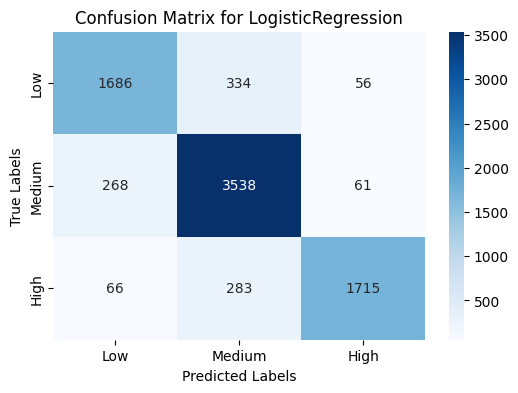

(LogisticRegression(), array([1, 0, 1, ..., 1, 0, 0]))

In [2515]:
classifier_gamers(X_train, X_test, y_train, y_test, LogisticRegression)

Model Accuracy: 85.0631
Test set RMSE of dt: 0.50
CV RMSE: 0.50
Train RMSE: 0.00
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      2076
           1       0.89      0.87      0.88      3867
           2       0.82      0.83      0.82      2064

    accuracy                           0.85      8007
   macro avg       0.84      0.85      0.84      8007
weighted avg       0.85      0.85      0.85      8007



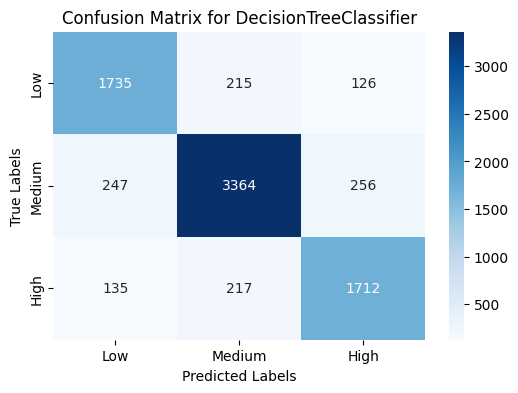

(DecisionTreeClassifier(), array([1, 0, 1, ..., 1, 1, 0]))

In [2516]:
classifier_gamers(X_train, X_test, y_train, y_test, DecisionTreeClassifier)

Model Accuracy: 91.7073
Test set RMSE of dt: 0.37
CV RMSE: 0.37
Train RMSE: 0.33
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      2076
           1       0.92      0.95      0.93      3867
           2       0.92      0.88      0.90      2064

    accuracy                           0.92      8007
   macro avg       0.92      0.91      0.91      8007
weighted avg       0.92      0.92      0.92      8007



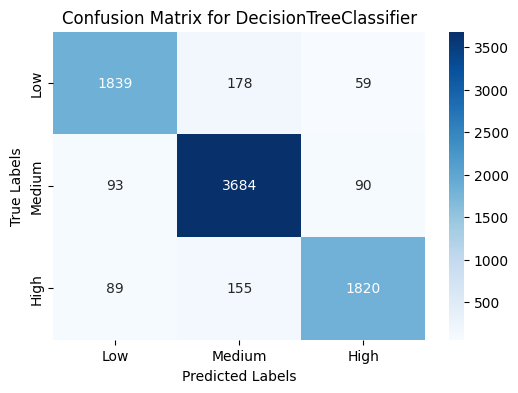

(DecisionTreeClassifier(max_depth=10), array([1, 0, 1, ..., 1, 1, 0]))

In [2517]:
classifier_gamers(X_train, X_test, y_train, y_test, DecisionTreeClassifier,max_depth=10)

Model Accuracy: 92.1943
Test set RMSE of dt: 0.36
CV RMSE: 0.36
Train RMSE: 0.34
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90      2076
           1       0.92      0.96      0.94      3867
           2       0.93      0.89      0.91      2064

    accuracy                           0.92      8007
   macro avg       0.92      0.91      0.92      8007
weighted avg       0.92      0.92      0.92      8007



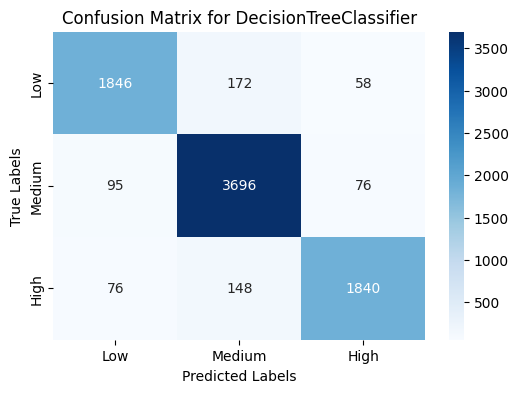

(DecisionTreeClassifier(max_depth=10, min_samples_leaf=5),
 array([1, 0, 1, ..., 1, 1, 0]))

In [2518]:
classifier_gamers(X_train, X_test, y_train, y_test, DecisionTreeClassifier,max_depth=10,min_samples_leaf=5)

Model Accuracy: 91.7697
Test set RMSE of dt: 0.36
CV RMSE: 0.36
Train RMSE: 0.01
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      2076
           1       0.91      0.95      0.93      3867
           2       0.93      0.88      0.91      2064

    accuracy                           0.92      8007
   macro avg       0.92      0.91      0.91      8007
weighted avg       0.92      0.92      0.92      8007



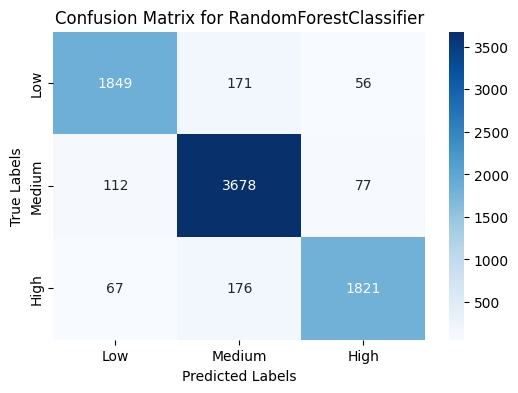

(RandomForestClassifier(), array([1, 0, 1, ..., 1, 1, 1]))

In [2519]:
classifier_gamers(X_train, X_test, y_train, y_test, RandomForestClassifier)

Model Accuracy: 90.9954
Test set RMSE of dt: 0.37
CV RMSE: 0.37
Train RMSE: 0.35
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89      2076
           1       0.90      0.95      0.92      3867
           2       0.93      0.87      0.90      2064

    accuracy                           0.91      8007
   macro avg       0.91      0.90      0.91      8007
weighted avg       0.91      0.91      0.91      8007



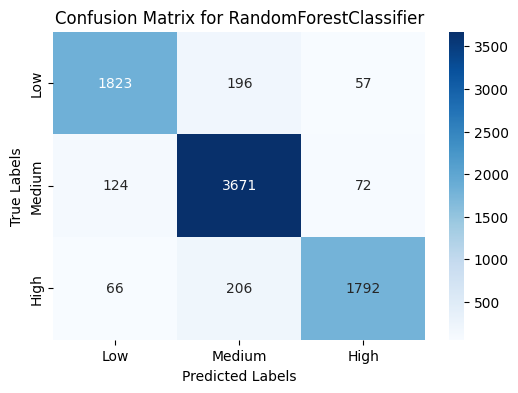

(RandomForestClassifier(max_depth=10), array([2, 0, 1, ..., 1, 1, 1]))

In [2520]:
classifier_gamers(X_train, X_test, y_train, y_test, RandomForestClassifier,max_depth=10)

Model Accuracy: 80.5420
Test set RMSE of dt: 0.48
CV RMSE: 0.48
Train RMSE: 0.48
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.65      0.72      2076
           1       0.77      0.89      0.83      3867
           2       0.88      0.81      0.84      2064

    accuracy                           0.81      8007
   macro avg       0.82      0.78      0.80      8007
weighted avg       0.81      0.81      0.80      8007



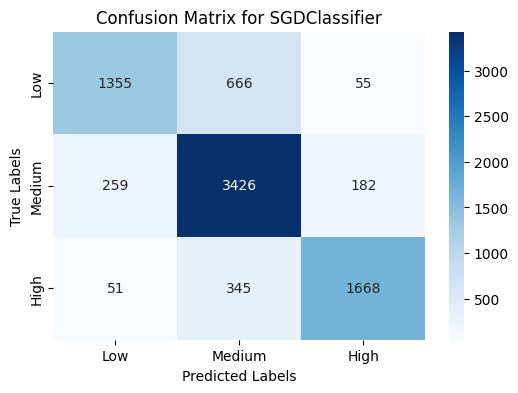

(SGDClassifier(), array([2, 0, 1, ..., 1, 0, 1]))

In [2521]:
classifier_gamers(X_train, X_test, y_train, y_test, SGDClassifier)

Model Accuracy: 81.7784
Test set RMSE of dt: 0.47
CV RMSE: 0.47
Train RMSE: 0.47
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.64      0.72      2076
           1       0.78      0.90      0.84      3867
           2       0.90      0.84      0.87      2064

    accuracy                           0.82      8007
   macro avg       0.83      0.79      0.81      8007
weighted avg       0.82      0.82      0.81      8007



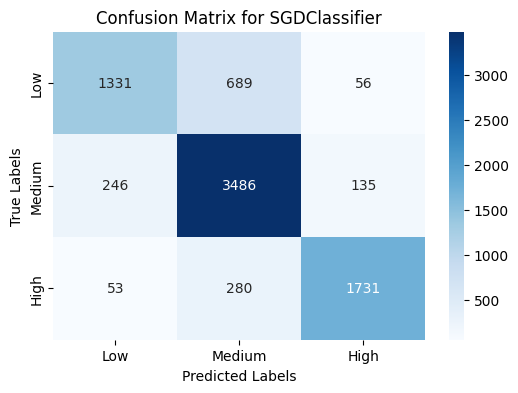

(SGDClassifier(alpha=0.001), array([2, 0, 0, ..., 1, 0, 1]))

In [2522]:
classifier_gamers(X_train, X_test, y_train, y_test, SGDClassifier,alpha=0.001)

Model Accuracy: 92.5940
Test set RMSE of dt: 0.35
Train RMSE: 0.30
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91      2076
           1       0.92      0.96      0.94      3867
           2       0.93      0.90      0.92      2064

    accuracy                           0.93      8007
   macro avg       0.93      0.92      0.92      8007
weighted avg       0.93      0.93      0.93      8007



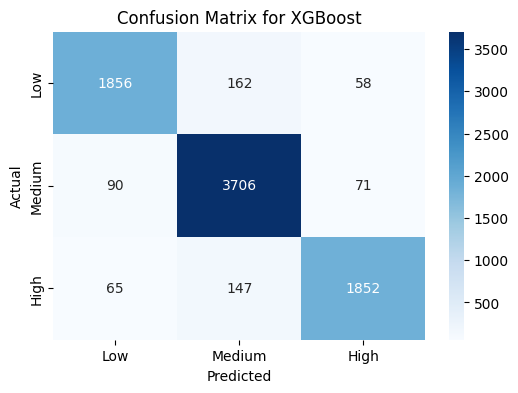

In [2724]:
xgb_model = XGBClassifier(
    objective='multi:softprob',  # Multi-class classification
    eval_metric='mlogloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

score = xgb_model.score(X_test, y_test)
print(f"Model Accuracy: {score*100:.4f}")
mse_dt = MSE(y_test, y_pred)
# Compute rmse_dt
rmse_dt = mse_dt**(1/2)
# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

#MSE_CV_scores = - cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='accuracy', =-1) 

# Compute the 10-folds CV RMSE
#RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
#print('CV RMSE: {:.2f}'.format(RMSE_CV))

# Predict the labels of the training set
y_pred_train = xgb_model.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost')
plt.show()

In [2524]:
from xgboost import DMatrix, cv

# Convert data into DMatrix format
dtrain = DMatrix(X_train, label=y_train)

# Define Parameters for XGBoost
params = {
    'objective': 'multi:softprob',
    'eval_metric': 'mlogloss',
    'num_class': len(set(y_train)),  # Number of classes
    'random_state': 42
}

# Perform Cross-Validation
cv_results = cv(params, dtrain, num_boost_round=100, nfold=10, metrics='mlogloss', 
                early_stopping_rounds=10, seed=42)

print(cv_results.head())

# Get the mean validation error (log loss) across all folds
mean_cv_error = cv_results['test-mlogloss-mean'].iloc[-1]  # Last row contains the final error

print(f"Average Cross-Validation Log Loss: {mean_cv_error:.4f}")


   train-mlogloss-mean  train-mlogloss-std  test-mlogloss-mean  \
0             0.787081            0.000605            0.790187   
1             0.610226            0.000683            0.615355   
2             0.499282            0.000891            0.506113   
3             0.426743            0.000965            0.434995   
4             0.378542            0.001096            0.388190   

   test-mlogloss-std  
0           0.002226  
1           0.003899  
2           0.005127  
3           0.006283  
4           0.007124  
Average Cross-Validation Log Loss: 0.3054


In [ ]:
feature_importance_df = pd.DataFrame({
        'Feature': x.columns, 
        'Importance': xgb_model.feature_importances_})

feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, color='blue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance from Model")
plt.show()

Model Accuracy: 91.0828
Test set RMSE of dt: 0.37
CV RMSE: 0.37
Train RMSE: 0.35
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89      2076
           1       0.90      0.95      0.93      3867
           2       0.93      0.87      0.90      2064

    accuracy                           0.91      8007
   macro avg       0.91      0.90      0.91      8007
weighted avg       0.91      0.91      0.91      8007



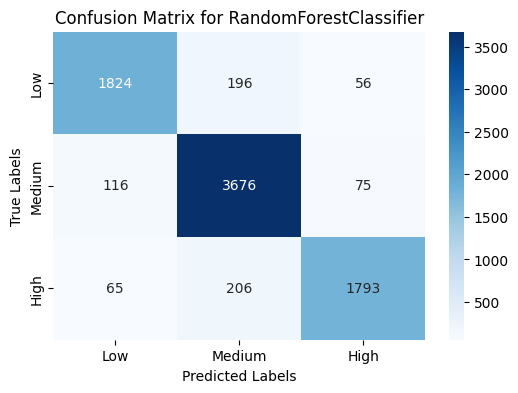

In [2526]:
final_model,y_pred = classifier_gamers(X_train, X_test, y_train, y_test, RandomForestClassifier,max_depth=10)

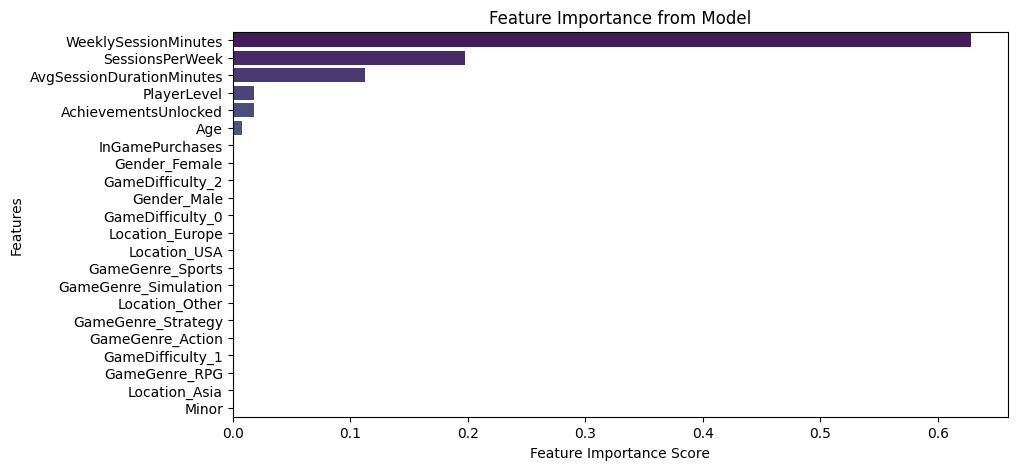

In [2528]:
feature_importance_df = pd.DataFrame({
        'Feature': x.columns, 
        'Importance': final_model.feature_importances_})

feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, hue='Feature',palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance from Model")
plt.show()

In [2529]:
x1 = df_reduced_tsne
y1 = df['EngagementLevel']

(X_train1, X_test1, y_train1, y_test1) = train_test_split(x, y, test_size=.20,random_state=16)

scaler = StandardScaler()
scaler.fit(X_train1)
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

Model Accuracy: 91.7572
Test set RMSE of dt: 0.37
CV RMSE: 0.37
Train RMSE: 0.33
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      2076
           1       0.92      0.95      0.93      3867
           2       0.93      0.88      0.90      2064

    accuracy                           0.92      8007
   macro avg       0.92      0.91      0.91      8007
weighted avg       0.92      0.92      0.92      8007



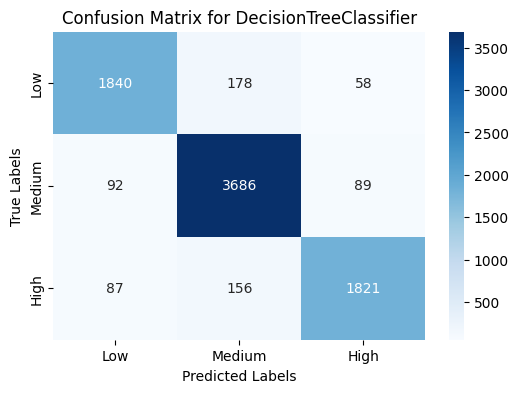

(DecisionTreeClassifier(max_depth=10), array([1, 0, 1, ..., 1, 1, 0]))

In [2532]:
classifier_gamers(X_train1, X_test1, y_train1, y_test1, DecisionTreeClassifier,max_depth=10)

Model Accuracy: 91.0328
Test set RMSE of dt: 0.37
CV RMSE: 0.37
Train RMSE: 0.35
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89      2076
           1       0.90      0.95      0.93      3867
           2       0.93      0.87      0.90      2064

    accuracy                           0.91      8007
   macro avg       0.91      0.90      0.91      8007
weighted avg       0.91      0.91      0.91      8007



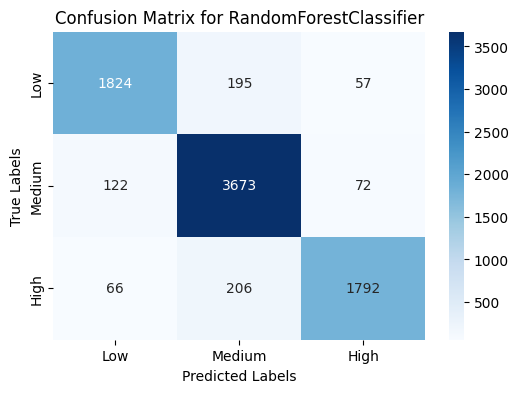

(RandomForestClassifier(max_depth=10), array([2, 0, 1, ..., 1, 1, 1]))

In [2534]:
classifier_gamers(X_train1, X_test1, y_train1, y_test1, RandomForestClassifier,max_depth=10)

In [2535]:
x = df_cleaned.drop('EngagementLevel', axis=1)
y = df_cleaned['EngagementLevel']

x['t-SNE1'] = df_reduced_tsne['t-SNE1']
x['t-SNE2'] = df_reduced_tsne['t-SNE2']

(X_train2, X_test2, y_train2, y_test2) = train_test_split(x, y, test_size=.20,random_state=16)

scaler = StandardScaler()
scaler.fit(X_train2)
X_train1 = scaler.transform(X_train2)
X_test1 = scaler.transform(X_test2)

Model Accuracy: 91.7947
Test set RMSE of dt: 0.37
CV RMSE: 0.37
Train RMSE: 0.33
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90      2076
           1       0.92      0.95      0.93      3867
           2       0.92      0.89      0.91      2064

    accuracy                           0.92      8007
   macro avg       0.92      0.91      0.91      8007
weighted avg       0.92      0.92      0.92      8007



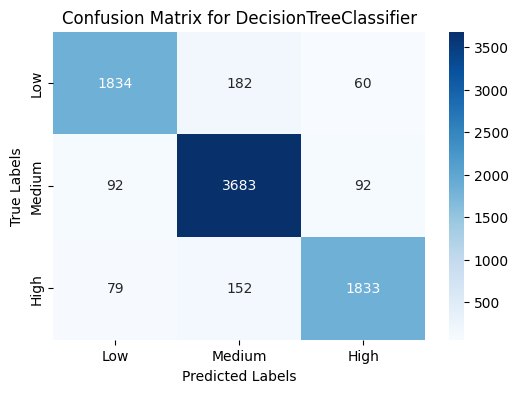

(DecisionTreeClassifier(max_depth=10), array([1, 0, 1, ..., 1, 1, 0]))

In [2536]:
classifier_gamers(X_train2, X_test2, y_train2, y_test2, DecisionTreeClassifier,max_depth=10)

Model Accuracy: 90.8705
Test set RMSE of dt: 0.37
CV RMSE: 0.37
Train RMSE: 0.36
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      2076
           1       0.90      0.95      0.92      3867
           2       0.93      0.87      0.90      2064

    accuracy                           0.91      8007
   macro avg       0.91      0.90      0.90      8007
weighted avg       0.91      0.91      0.91      8007



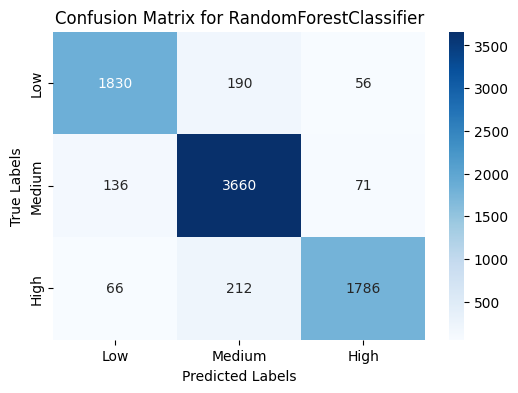

(RandomForestClassifier(max_depth=10), array([2, 0, 1, ..., 1, 1, 1]))

In [2537]:
classifier_gamers(X_train2, X_test2, y_train2, y_test2, RandomForestClassifier,max_depth=10)

In [2538]:
x = df_cleaned.drop('EngagementLevel', axis=1)
y = df_cleaned['EngagementLevel']

(X_train, X_test, y_train, y_test) = train_test_split(x, y, test_size=.20,random_state=16)

Model Accuracy: 90.0712
Test set RMSE of dt: 0.38
CV RMSE: 0.38
Train RMSE: 0.37
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      2076
           1       0.91      0.91      0.91      3867
           2       0.93      0.87      0.90      2064

    accuracy                           0.90      8007
   macro avg       0.90      0.90      0.90      8007
weighted avg       0.90      0.90      0.90      8007



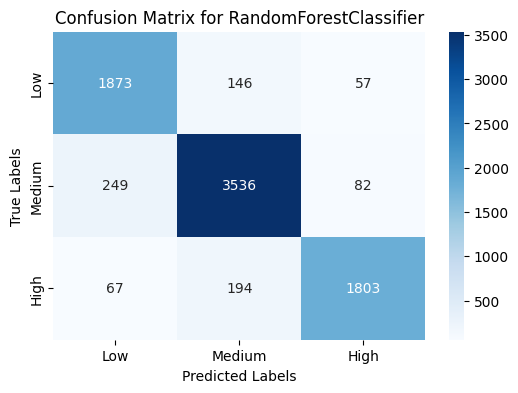

In [2539]:
class_weights = {0: 3, 1: 1, 2: 1}  # Adjust as needed

model, y_pred = classifier_gamers(X_train, X_test, y_train, y_test, RandomForestClassifier,max_depth=10, class_weight=class_weights)

In [2540]:
y_pred

array([2, 0, 1, ..., 1, 1, 0])

In [2541]:
X_test_post = X_test.copy()
X_test_post['EngagementLevel_Predicted'] = y_pred

X_test_post['EngagementLevel'] = y_test

X_test_post

Age  InGamePurchases  SessionsPerWeek  AvgSessionDurationMinutes  \
21278   19                0               11                        129   
19337   39                0                1                         60   
39940   30                1                5                         81   
10410   25                1               15                         93   
28618   35                0               16                        112   
...    ...              ...              ...                        ...   
18562   48                1                6                        166   
33350   21                1                5                         41   
21015   18                0               14                         87   
1655    33                0                8                         48   
32695   18                0               12                         27   

       PlayerLevel  AchievementsUnlocked  WeeklySessionMinutes  Minor  \
21278           23                     3                  1419      0   
19337           15                    42                    60      0   
39940           15                    24                   405      0   
10410           40                    30                  1395      0   
28618           84                    18                  1792      0   
...            ...                   ...                   ...    ...   
18562           47                    46                   996      0   
33350           61                    28                   205      0   
21015           97                    34                  1218      1   
1655            53                     0                   384      0   
32695            6                    18                   324      1   

       Gender_Female  Gender_Male  ...  GameGenre_Action  GameGenre_RPG  \
21278              0            1  ...                 0              0   
19337              0            1  ...                 0              0   
39940              0            1  ...                 0              0   
10410              0            1  ...                 0              0   
28618              0            1  ...                 1              0   
...              ...          ...  ...               ...            ...   
18562              0            1  ...                 0              0   
33350              1            0  ...                 0              0   
21015              0            1  ...                 1              0   
1655               0            1  ...                 0              0   
32695              1            0  ...                 0              0   

       GameGenre_Simulation  GameGenre_Sports  GameGenre_Strategy  \
21278                     0                 1                   0   
19337                     1                 0                   0   
39940                     0                 0                   1   
10410                     0                 0                   1   
28618                     0                 0                   0   
...                     ...               ...                 ...   
18562                     0                 1                   0   
33350                     0                 1                   0   
21015                     0                 0                   0   
1655                      0                 1                   0   
32695                     0                 0                   1   

       GameDifficulty_0  GameDifficulty_1  GameDifficulty_2  \
21278                 0                 1                 0   
19337                 0                 0                 1   
39940                 0                 1                 0   
10410                 1                 0                 0   
28618                 1                 0                 0   
...                 ...               ...               ...   
18562                 0                 0                 

In [2279]:
X_test_post[(X_test_post['EngagementLevel']!=X_test_post['EngagementLevel_Predicted']) & (X_test_post['EngagementLevel']==1) & (X_test_post['EngagementLevel_Predicted']==0)]

Age  PlayTimeHours  InGamePurchases  SessionsPerWeek  \
26093   37       1.750832                0                0   
35661   38      10.546546                1                4   
32345   39       0.385171                0                0   
11061   36      13.518634                0                3   
33344   49      12.096818                0                1   
...    ...            ...              ...              ...   
2976    43      14.148066                0                0   
37138   37      11.405837                0                6   
9188    37      12.363483                0                3   
20731   21      22.385374                0                2   
18195   49      16.238688                0                4   

       AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked  \
26093                         72           90                    49   
35661                         67           70                    24   
32345                         90           54                    49   
11061                         61           86                    43   
33344                        159           21                    32   
...                          ...          ...                   ...   
2976                          12           97                    10   
37138                         36           51                    44   
9188                          55           99                    39   
20731                        120           71                    42   
18195                         69           42                    32   

       WeeklySessionMinutes  Minor  Gender_Female  ...  GameGenre_Action  \
26093                     0      0              1  ...                 1   
35661                   268      0              0  ...                 0   
32345                     0      0              0  ...                 0   
11061                   183      0              1  ...                 0   
33344                   159      0              0  ...                 0   
...                     ...    ...            ...  ...               ...   
2976                      0      0              0  ...                 0   
37138                   216      0              0  ...                 0   
9188                    165      0              0  ...                 0   
20731                   240      0              1  ...                 0   
18195                   276      0              1  ...                 0   

       GameGenre_RPG  GameGenre_Simulation  GameGenre_Sports  \
26093              0                     0                 0   
35661              0                     0                 0   
32345              0                     0                 0   
11061              1                     0                 0   
33344              0                     0                 1   
...              ...                   ...               ...   
2976               0                     1                 0   
37138              1                     0                 0   
9188               1                     0                 0   
20731              0                     0                 0   
18195              0                     0                 0   

       GameGenre_Strategy  GameDifficulty_0  GameDifficulty_1  \
26093                   0                 1                 0   
35661                   1                 1                 0   
32345                   1                 1                 0   
11061                   0                 1                 0   
33344                   0                 0                 0   
...                   ...               ...               ...   
2976                    0                 1                 0   
37138                   0                 1                 0   
9188                    0                 1                 0   
20731                   1                 0                 0   


In [2291]:
X_test_post[(X_test_post['EngagementLevel']!=X_test_post['EngagementLevel_Predicted']) & (X_test_post['EngagementLevel']==1) & (X_test_post['EngagementLevel_Predicted']==0)]['WeeklySessionMinutes'].mean()


208.03238866396762

In [2293]:
X_test_post[(X_test_post['EngagementLevel']!=X_test_post['EngagementLevel_Predicted']) & (X_test_post['EngagementLevel']==1) & (X_test_post['EngagementLevel_Predicted']==0)]['AchievementsUnlocked'].mean()


31.37246963562753

In [2295]:
X_test_post[(X_test_post['EngagementLevel']!=X_test_post['EngagementLevel_Predicted']) & (X_test_post['EngagementLevel']==1) & (X_test_post['EngagementLevel_Predicted']==0)]['PlayerLevel'].mean()


62.59109311740891

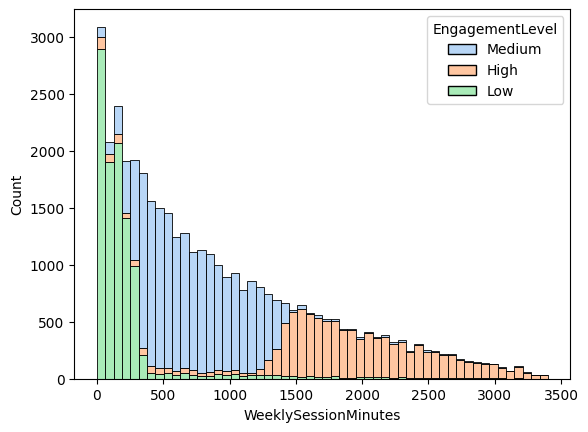

In [2287]:
df['WeeklySessionMinutes'] = df['SessionsPerWeek'] * df['AvgSessionDurationMinutes']
sns.histplot(data=df, x='WeeklySessionMinutes',hue='EngagementLevel',multiple='stack',palette='pastel')
plt.show()

 99%|===================| 23796/24021 [01:58<00:01]        /var/folders/_5/5xzxgkc15jdg71sltgfrs8rm0000gn/T/ipykernel_12251/1826461298.py:8: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test,cmap='mako')


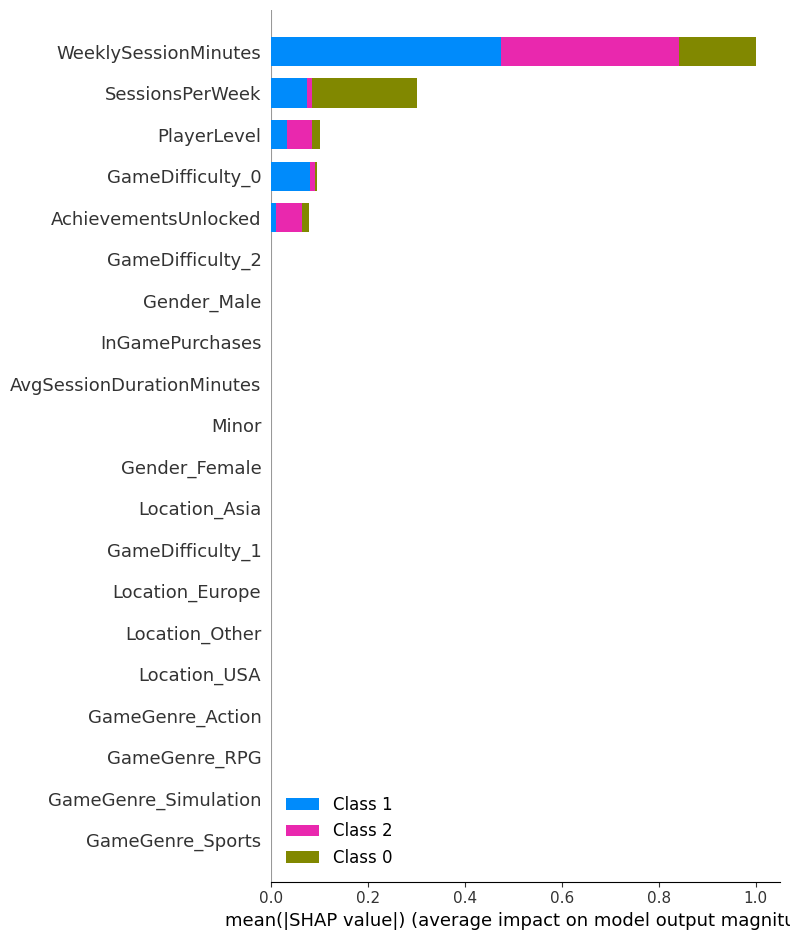

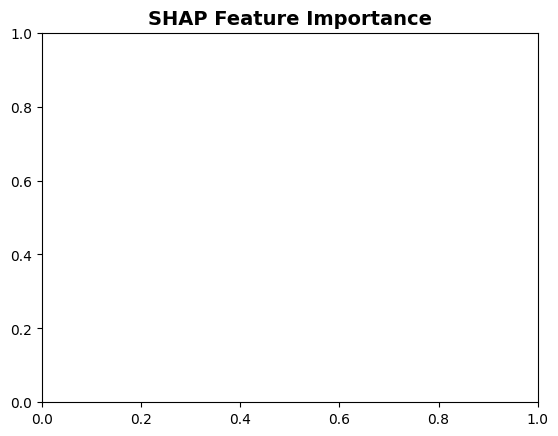

In [2571]:
# Explain the model's predictions using SHAP values
# Initialize SHAP Explainer
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

# Create the summary plot with violin-style visualization
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values, X_test,cmap='mako')

plt.title("SHAP Feature Importance", fontsize=14, fontweight="bold")
plt.show()

# 🔹 Force Plot (Explains Individual Predictions)
#shap.initjs()
#shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])

In [2742]:
df[df['EngagementLevel']=='Medium']['SessionsPerWeek'].mean()

9.553267265407246